

#**INTEGRANTES**



*   Casanova, Beverly
*   Nuñez, Lourdes
*   Cardozo, Pamela




# **¿QUÉ ES UN FRAUDE?**

Se trara de un delito contra la propiedad que consiste en defraudar a otro utilizando algún tipo de engaño. La pena prevista para el delito de estafa es la prisión de un mes a 6 años, según el artículo 175 del Código Penal de la Nación Argentina.


**¿CUANDO ES FRAUDE FINANCIERO?**

Esto ocurre cuando una persona lo priva de su dinero, o capital o de otra manera daña su salud financiera por medio de prácticas engañosas,confusas u otras prácticas ilegales. Esto se puede hacer a través de una variedad de métodos como robo de identidad o fraude de inversión.


**MODALIDADES COMUNES DE FRAUDE FINANCIERO :**




1.   **Fraude Contable:** Manipulación de los estados financieros de una empresa para presentar una imagen falsa de su situación económica.

2.   **Esquemas Ponzi:** Estrategias de inversión fraudulentas que prometen altas tasas de retorno con poco riesgo para los inversores.

3.   **Fraude con Tarjetas de Crédito:** Uso no autorizado de tarjetas de crédito para realizar compras o retirar fondos.


4.   **Lavado de Dinero:** Proceso de hacer que el dinero obtenido de actividades ilegales parezca legítimo.


5.   **Ciberfraude:** Ataques cibernéticos para robar información financiera, realizar transferencias fraudulentas o cometer otros delitos relacionados con la tecnología.






#**FRAUDES FINANCIEROS**

En el presente trabajo se hace un análisis sobre un tema de gran relevancia en el mundo financiero: el **fraude con tarjetas de crédito**. Este fenómeno, que
afecta tanto a consumidores como a instituciones financieras, ha cobrado
importancia debido al aumento de las transacciones electrónicas y al uso generalizado de tarjetas de crédito.

Nuestro análisis se basa en un conjunto de datos detallado que recoge diversas transacciones con tarjetas de crédito, clasificadas según si son fraudulentas o no. Este dataset proporciona una oportunidad única para explorar los patrones y características que distinguen a las transacciones legítimas de las fraudulentas.

Este proyecto no solo busca identificar transacciones fraudulentas de manera eficiente, sino también proporcionar herramientas y conocimientos que pueden ser aplicados en contextos similares de detección de fraudes.






## Objetivos del proyecto

*   Detectar patrones en fraudes considerenado hora del dia, categoria y lugar.
*   Entender cómo y por qué ocurren los fraudes con tarjetas de crédito
*   Identificar variables relevantes para la detección de fraude




## Origen del Dataset

Debido a que la mayoría de los Dataset de Argentina son incompletos,con pocos datos y en su mayoría privados, elegimos un Dataset Internacional, y simularemos que es un banco de Argentina.
Proporcionamos el link de nuestro Dataset: https://www.kaggle.com/datasets/kelvinkelue/credit-card-fraud-prediction

# CARGAMOS LIBRERÍAS A UTILIZAR

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import missingno as msno
%matplotlib inline

In [2]:
from google.colab import drive #importamos
drive.mount('/content/drive')

Mounted at /content/drive


**REALIZAMOS LA LECTURA DE NUESTRA BASE DE DATOS**

In [3]:
# Leemos el archivo csv
df_fraude = pd.read_csv('/content/drive/My Drive/Curso Ingenias/fraud_test.csv', delimiter=',',index_col=0)

# DETALLES DE LA BASE DE DATOS

---






In [4]:
#Visualizamos el dataframe
df_fraude.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,21/06/2020 12:14,2.291160e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,...,33.9659,-80.9355,333497,Mechanical engineer,19/03/1968,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,21/06/2020 12:14,3.573030e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,...,40.3207,-110.4360,302,"Sales professional, IT",17/01/1990,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,21/06/2020 12:14,3.598220e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,...,40.6729,-73.5365,34496,"Librarian, public",21/10/1970,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,21/06/2020 12:15,3.591920e+15,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,...,28.5697,-80.8191,54767,Set designer,25/07/1987,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,21/06/2020 12:15,3.526830e+15,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,...,44.2529,-85.0170,1126,Furniture designer,06/07/1955,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [5]:
# Se observa cuantas filas y columnas tiene
print("\nEl dataframe tiene {} filas y {} columnas.".format(df_fraude.shape[0], df_fraude.shape[1]))


El dataframe tiene 555719 filas y 22 columnas.


In [6]:
# Obtenemos información general del conjunto de datos
print("\nInformación general del conjunto de datos:")
print(df_fraude.info())


Información general del conjunto de datos:
<class 'pandas.core.frame.DataFrame'>
Index: 555719 entries, 0 to 555718
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   trans_date_trans_time  555719 non-null  object 
 1   cc_num                 555719 non-null  float64
 2   merchant               555719 non-null  object 
 3   category               555719 non-null  object 
 4   amt                    555719 non-null  float64
 5   first                  555719 non-null  object 
 6   last                   555719 non-null  object 
 7   gender                 555719 non-null  object 
 8   street                 555719 non-null  object 
 9   city                   555719 non-null  object 
 10  state                  555719 non-null  object 
 11  zip                    555719 non-null  int64  
 12  lat                    555719 non-null  float64
 13  long                   555719 non-null  float64
 1

# COLUMNAS

**`Descripción de las Variables`**
* **Trans_date_trans_time**: Marca de tiempo de la transacción (fecha y hora).
* **Cc_num**: Número de identificación único del cliente.
* **Merchant**: El comerciante involucrado en la transacción.
* **Category**: Tipo de transacción (por ejemplo, personal, cuidado de niños).
* **Amt**: Monto de la transacción.
* **First**: Nombre del titular de la tarjeta.
* **Last**: Apellido del titular de la tarjeta.
* **Gender**: Género del titular de la tarjeta.
* **Street**: Dirección del titular de la tarjeta.
* **City**: Ciudad de residencia del titular de la tarjeta.
* **State**: Estado de residencia del titular de la tarjeta.
* **Zip**: Código postal del titular de la tarjeta.
* **Lat**: Latitud de la ubicación del titular de la tarjeta.
* **Long**: Longitud de la ubicación del titular de la tarjeta.
* **City_pop**: Población de la ciudad del titular de la tarjeta.
* **Job**: Título del trabajo del titular de la tarjeta.
* **Dob**: Fecha de nacimiento del titular de la tarjeta.
* **Trans_num**: Identificador único de la transacción.
* **Unix_time**: Marca de tiempo de la transacción (formato Unix).
* **Merch_lat**: Ubicación del comerciante (latitud).
* **Merch_long**: Ubicación del comerciante (longitud).
* **Is_fraud**: Indicador de transacción fraudulenta (1 = fraude, 0 = legítima). Esta es la variable objetivo para propósitos de clasificación.

In [7]:
# Visualizamos las columnas
df_fraude.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')

In [8]:
# Para facilitar nuestro dataset, se renombran las columnnas de ingles a español.
# Diccionario de mapeo de nombres en inglés a español
columnas_renombradas = {
    'trans_date_trans_time': 'fecha_transaccion',
    'cc_num': 'num_tarjeta',
    'merchant': 'comerciante',
    'category': 'categoria',
    'amt': 'monto',
    'first': 'nombre',
    'last': 'apellido',
    'gender': 'genero',
    'street': 'calle',
    'city': 'ciudad',
    'state': 'estado',
    'zip': 'codigo_postal',
    'lat': 'latitud',
    'long': 'longitud',
    'city_pop': 'poblacion_ciudad',
    'job': 'trabajo',
    'dob': 'fecha_nacimiento',
    'trans_num': 'num_transaccion',
    'unix_time': 'tiempo_unix',
    'merch_lat': 'latitud_comerciante',
    'merch_long': 'longitud_comerciante',
    'is_fraud': 'es_fraude'
}

# Renombramos las columnas
df_fraude.rename(columns=columnas_renombradas, inplace=True)

# Mostramos los nuevos nombres de las columnas
print("Columnas renombradas:", df_fraude.columns)

Columnas renombradas: Index(['fecha_transaccion', 'num_tarjeta', 'comerciante', 'categoria', 'monto',
       'nombre', 'apellido', 'genero', 'calle', 'ciudad', 'estado',
       'codigo_postal', 'latitud', 'longitud', 'poblacion_ciudad', 'trabajo',
       'fecha_nacimiento', 'num_transaccion', 'tiempo_unix',
       'latitud_comerciante', 'longitud_comerciante', 'es_fraude'],
      dtype='object')


In [9]:
# Visualizamos el dataset para ver el cambio de columnas renombradas.
df_fraude.head()

,fecha_transaccion,num_tarjeta,comerciante,categoria,monto,nombre,apellido,genero,calle,ciudad,...,latitud,longitud,poblacion_ciudad,trabajo,fecha_nacimiento,num_transaccion,tiempo_unix,latitud_comerciante,longitud_comerciante,es_fraude
0,21/06/2020 12:14,2.291160e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,...,33.9659,-80.9355,333497,Mechanical engineer,19/03/1968,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,21/06/2020 12:14,3.573030e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,...,40.3207,-110.4360,302,"Sales professional, IT",17/01/1990,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,21/06/2020 12:14,3.598220e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,...,40.6729,-73.5365,34496,"Librarian, public",21/10/1970,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,21/06/2020 12:15,3.591920e+15,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,...,28.5697,-80.8191,54767,Set designer,25/07/1987,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,21/06/2020 12:15,3.526830e+15,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,...,44.2529,-85.0170,1126,Furniture designer,06/07/1955,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [10]:
# Mostramos el tipo de dato de cada columna.
df_fraude.dtypes

,0
fecha_transaccion,object
num_tarjeta,float64
comerciante,object
categoria,object
monto,float64
nombre,object
apellido,object
genero,object
calle,object
ciudad,object


Se demuestra que cada columna coincide con su tipo de dato

**Cualitativas (Categóricas):**
fecha_transaccion, comerciante, categoria, nombre, apellido, genero, calle, ciudad, estado, trabajo, fecha_nacimiento, num_transaccion.

**Cuantitativas (Numéricas):**

**Discretas:** codigo_postal, poblacion_ciudad, es_fraude.

**Continuas:** num_tarjeta, monto, latitud, longitud, tiempo_unix, latitud_comerciante, longitud_comerciante.

****

**`DETALLES DE LAS COLUMNAS`**

In [11]:
# Vemos si hay datos nulos.
df_fraude.isnull().sum()

,0
fecha_transaccion,0
num_tarjeta,0
comerciante,0
categoria,0
monto,0
nombre,0
apellido,0
genero,0
calle,0
ciudad,0


<Axes: >

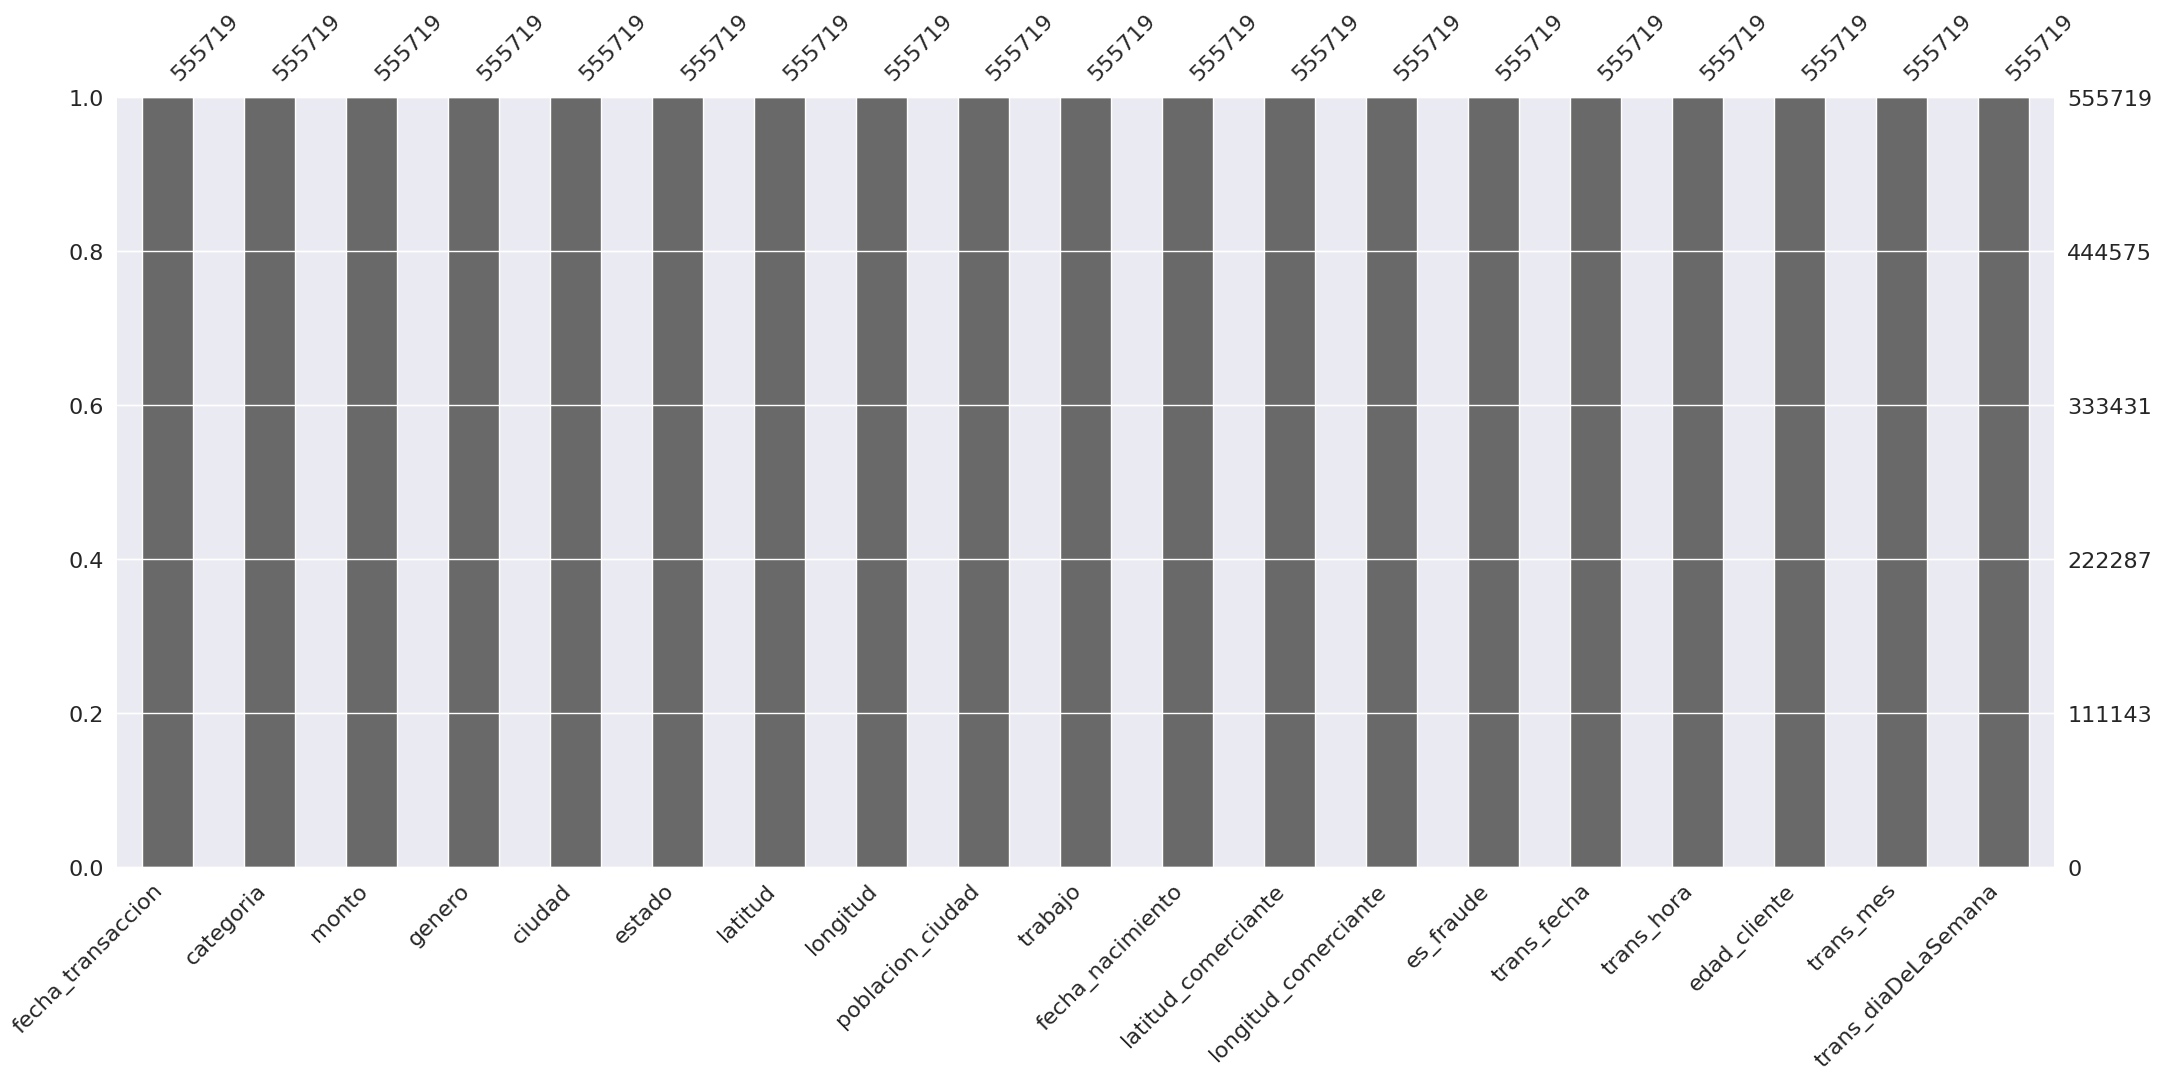

In [38]:
msno.bar(df_fraude)
# Visualizar la cantidad de valores no nulos por columna

OBSERVACIÓN: Se ve que no hay valores nulos en las columnas del Dataset.

**`COLUMNAS FECHA Y HORA`**

Se crean columnas nuevas para tener la fecha y hora separadas.

In [12]:
df_fraude['trans_fecha'] = pd.to_datetime(df_fraude['fecha_transaccion']).dt.date
df_fraude['trans_hora'] = pd.to_datetime(df_fraude['fecha_transaccion']).dt.hour

# Verificamos las nuevas columnas
df_fraude.head()

<ipython-input-12-6b018980d4e0>:1: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_fraude['trans_fecha'] = pd.to_datetime(df_fraude['fecha_transaccion']).dt.date
<ipython-input-12-6b018980d4e0>:2: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_fraude['trans_hora'] = pd.to_datetime(df_fraude['fecha_transaccion']).dt.hour


,fecha_transaccion,num_tarjeta,comerciante,categoria,monto,nombre,apellido,genero,calle,ciudad,...,poblacion_ciudad,trabajo,fecha_nacimiento,num_transaccion,tiempo_unix,latitud_comerciante,longitud_comerciante,es_fraude,trans_fecha,trans_hora
0,21/06/2020 12:14,2.291160e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,...,333497,Mechanical engineer,19/03/1968,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0,2020-06-21,12
1,21/06/2020 12:14,3.573030e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,...,302,"Sales professional, IT",17/01/1990,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0,2020-06-21,12
2,21/06/2020 12:14,3.598220e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,...,34496,"Librarian, public",21/10/1970,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0,2020-06-21,12
3,21/06/2020 12:15,3.591920e+15,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,...,54767,Set designer,25/07/1987,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0,2020-06-21,12
4,21/06/2020 12:15,3.526830e+15,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,...,1126,Furniture designer,06/07/1955,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0,2020-06-21,12


**`COLUMNA GÉNERO`**

In [14]:
df_fraude['genero'].value_counts()

,count
genero,
F,304886
M,250833


**`COLUMNA EDAD`**

Se creo una columna edad que muestra la edad del cliente

In [15]:
df_fraude['fecha_nacimiento'] = pd.to_datetime(df_fraude['fecha_nacimiento'])
df_fraude['trans_fecha'] = pd.to_datetime(df_fraude['trans_fecha'])
df_fraude['edad_cliente'] = df_fraude['trans_fecha'].dt.year - df_fraude['fecha_nacimiento'].dt.year

<ipython-input-15-6f2da88622f4>:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_fraude['fecha_nacimiento'] = pd.to_datetime(df_fraude['fecha_nacimiento'])


**`COLUMNA ESTADOS`**

Revisamos los valores únicos para estado:

In [16]:
estados_unicos = df_fraude['estado'].unique()
# Mostramos los estados únicos
print("Estados únicos en transacciones fraudulentas:")
print(estados_unicos)

Estados únicos en transacciones fraudulentas:
['SC' 'UT' 'NY' 'FL' 'MI' 'CA' 'SD' 'PA' 'TX' 'KY' 'WY' 'AL' 'LA' 'GA'
 'CO' 'OH' 'WI' 'VT' 'AR' 'NJ' 'IA' 'MD' 'MS' 'KS' 'IL' 'MO' 'ME' 'TN'
 'DC' 'AZ' 'MT' 'MN' 'OK' 'WA' 'WV' 'NM' 'MA' 'NE' 'VA' 'ID' 'OR' 'IN'
 'NC' 'NH' 'ND' 'CT' 'NV' 'HI' 'RI' 'AK']


Realizamos un conteo de cada uno de los estados

In [17]:
conteo_estados = df_fraude['estado'].value_counts()
# Mostramos el conteo de estados
print("Conteo de transacciones por estado:")
print(conteo_estados)

Conteo de transacciones por estado:
estado
TX    40393
NY    35918
PA    34326
CA    24135
OH    20147
MI    19671
IL    18960
FL    18104
AL    17532
MO    16501
MN    13719
AR    13484
NC    12868
SC    12541
KY    12506
VA    12506
WI    12370
IN    11959
IA    11819
OK    11379
GA    11277
MD    11152
WV    10838
NJ    10528
NE    10257
KS     9943
LA     8988
MS     8833
WY     8454
WA     8116
OR     7811
TN     7359
NM     7020
ME     6928
ND     6397
CO     5886
SD     5250
MA     5186
MT     5052
VT     5044
UT     4658
AZ     4592
NH     3449
CT     3277
ID     2490
NV     2451
DC     1517
HI     1090
AK      843
RI      195
Name: count, dtype: int64


**`COLUMNA TRANS-HORA`**

Revisamos los valores únicos para trans-hora

In [18]:
valores_unicos = df_fraude["trans_hora"].unique()
# Mostramos los valores únicos
print("Valores únicos de 'trans_hora':")
print(valores_unicos)

Valores únicos de 'trans_hora':
[12 13 14 15 16 17 18 19 20 21 22 23  0  1  2  3  4  5  6  7  8  9 10 11]


In [19]:
conteos_por_hora = df_fraude.groupby("trans_hora").size().reset_index(name='cantidad')

# Ordenamos de mayor a menor
conteos_por_hora = conteos_por_hora.sort_values(by='cantidad', ascending=False)

# Mostramos los valores de cuenta de eventos por hora
print(conteos_por_hora)

    trans_hora  cantidad
23          23     28798
16          16     28563
22          22     28388
21          21     28205
14          14     28204
13          13     28178
17          17     28064
15          15     28048
12          12     28037
18          18     28001
20          20     27983
19          19     27925
1            1     18461
3            3     18199
0            0     18153
2            2     18140
6            6     18106
7            7     18098
11          11     18088
4            4     18075
10          10     18049
9            9     18046
8            8     17993
5            5     17917


# DETALLES ESTADÍSTICOS

In [20]:
df_fraude.describe()

,num_tarjeta,monto,codigo_postal,latitud,longitud,poblacion_ciudad,fecha_nacimiento,tiempo_unix,latitud_comerciante,longitud_comerciante,es_fraude,trans_fecha,trans_hora,edad_cliente
count,5.557190e+05,555719.000000,555719.000000,555719.000000,555719.000000,5.557190e+05,555719,5.557190e+05,555719.000000,555719.000000,555719.000000,555719,555719.000000,555719.000000
mean,4.178387e+17,69.392810,48842.628015,38.543253,-90.231325,8.822189e+04,1973-11-11 16:30:05.937173264,1.380679e+09,38.542798,-90.231380,0.003860,2020-10-01 12:35:52.929807872,12.809062,46.636237
min,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1924-10-30 00:00:00,1.371817e+09,19.027422,-166.671575,0.000000,2020-06-21 00:00:00,0.000000,15.000000
25%,1.800430e+14,9.630000,26292.000000,34.668900,-96.798000,7.410000e+02,1962-09-27 00:00:00,1.376029e+09,34.755302,-96.905129,0.000000,2020-08-09 00:00:00,7.000000,33.000000
50%,3.521420e+15,47.290000,48174.000000,39.371600,-87.476900,2.408000e+03,1975-11-30 00:00:00,1.380762e+09,39.376593,-87.445204,0.000000,2020-10-03 00:00:00,14.000000,45.000000
75%,4.635330e+15,83.010000,72011.000000,41.894800,-80.175200,1.968500e+04,1987-04-23 00:00:00,1.385867e+09,41.954163,-80.264637,0.000000,2020-12-01 00:00:00,19.000000,58.000000
max,4.992350e+18,22768.110000,99921.000000,65.689900,-67.950300,2.906700e+06,2005-01-29 00:00:00,1.388534e+09,66.679297,-66.952026,1.000000,2020-12-31 00:00:00,23.000000,96.000000
std,1.309837e+18,156.745941,26855.283328,5.061336,13.721780,3.003909e+05,NaN,5.201104e+06,5.095829,13.733071,0.062008,NaN,6.810924,17.418528


**Cálculo de Media, Mediana y Moda**

In [78]:
# Media
media_monto = df_fraude['monto'].mean()
print(f"Media del Monto: {media_monto:.2f}")

# Mediana
mediana_monto = df_fraude['monto'].median()
print(f"Mediana del Monto: {mediana_monto:.2f}")

# Moda
moda_monto = df_fraude['monto'].mode()[0]  # mode() devuelve una Serie
print(f"Moda del Monto: {moda_monto:.2f}")


Media del Monto: 69.39
Mediana del Monto: 47.29
Moda del Monto: 1.10


**Desviación Estándar y Varianza**

In [79]:
# Desviación Estándar
desviacion_estandar_monto = df_fraude['monto'].std()
print(f"Desviación Estándar del Monto: {desviacion_estandar_monto:.2f}")

# Varianza
varianza_monto = df_fraude['monto'].var()
print(f"Varianza del Monto: {varianza_monto:.2f}")


Desviación Estándar del Monto: 156.75
Varianza del Monto: 24569.29


**Distribución de Frecuencias**

In [80]:
# Frecuencia de categorías
frecuencia_categorias = df_fraude['categoria'].value_counts()
print("\nFrecuencia de Categorías:")
print(frecuencia_categorias)

# Frecuencia de montos en rangos
bins = [0, 50, 100, 200, 500, 1000, 5000, 10000]
etiquetas = ['0-50', '50-100', '100-200', '200-500', '500-1000', '1000-5000', '5000+']
frecuencia_montos = pd.cut(df_fraude['monto'], bins=bins, labels=etiquetas).value_counts()
print("\nFrecuencia de Montos en Rangos:")
print(frecuencia_montos)



Frecuencia de Categorías:
categoria
gasolina_transporte      56370
supermercado             52553
hogar                    52345
compras                  49791
niños_mascotas           48692
compras_en_linea         41779
entretenimiento          40104
cuidado_personal         39327
comida                   39268
salud_ejercicio          36674
varios                   34574
varios_en_linea          27367
supermercado_en_linea    19426
viajes                   17449
Name: count, dtype: int64

Frecuencia de Montos en Rangos:
monto
0-50         288930
50-100       166804
100-200       74636
200-500       19271
500-1000       4495
1000-5000      1524
5000+            47
Name: count, dtype: int64


OBSERVACIÓN:
El análisis estadístico de las transacciones de tarjetas de crédito muestra lo siguiente:

Se procesaron un total de 555.719 transacciones. El monto promedio de las transacciones es `$69,99`, con una desviación estándar de `$156.75`, un mínimo de `$1.00` y un máximo de `$22,768.11`.

Las ciudades donde se realizaron las transacciones tienen una población media de 88.221 habitantes, con una desviación estándar de 303.909, un mínimo de 23 y un máximo de 2.906.700 habitantes. El tiempo Unix promedio de las transacciones es 1.38e+09, con una desviación estándar de 5.20e+06.

Finalmente, la proporción de transacciones fraudulentas es muy baja, con una media de 0.00386 y una desviación estándar de 0.062, variando entre 0 (no fraude) y 1 (fraude).

# GRÁFICOS DE ANÁLISIS

**`FRAUDE`**

In [21]:
# Filtramos el DataFrame para seleccionar solo las filas donde isFraud es 1
transacciones_fraudulentas = df_fraude[df_fraude['es_fraude'] == 1]

# Mostramos detalles de las transacciones fraudulentas
print("Detalles de las transacciones fraudulentas:")
print(transacciones_fraudulentas.head())

Detalles de las transacciones fraudulentas:
     fecha_transaccion   num_tarjeta                          comerciante  \
1685  21/06/2020 22:06  3.560730e+15                 fraud_Hamill-D'Amore   
1767  21/06/2020 22:32  6.564460e+15    fraud_Rodriguez, Yost and Jenkins   
1781  21/06/2020 22:37  6.564460e+15                     fraud_Nienow PLC   
1784  21/06/2020 22:38  4.005680e+15  fraud_Heathcote, Yost and Kertzmann   
1857  21/06/2020 23:02  3.560730e+15               fraud_Hermann and Sons   

             categoria    monto   nombre apellido genero  \
1685   salud_ejercicio    24.84   Brooke    Smith      F   
1767   varios_en_linea   780.52  Douglas   Willis      M   
1781   entretenimiento   620.33  Douglas   Willis      M   
1784  compras_en_linea  1077.69  William    Perry      M   
1857           compras   842.65   Brooke    Smith      F   

                             calle          ciudad  ...  \
1685     63542 Luna Brook Apt. 012         Notrees  ...   
1767    619 Je

**`PORCENTAJE FRAUDE Y NO FRAUDE`**

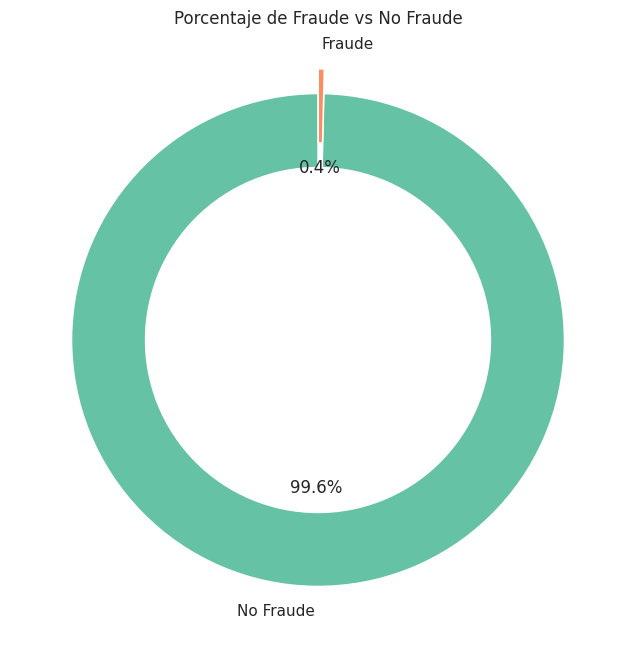

In [39]:
# Contar la cantidad de fraudes y no fraudes
fraude_counts = df_fraude['es_fraude'].value_counts()
labels = ['No Fraude', 'Fraude']
colors = ['#66c2a5', '#fc8d62']  # Colores más sutiles y contrastantes
explode = (0, 0.1)  # Resaltar la sección de fraude

# Crear gráfico de pastel
plt.figure(figsize=(8, 8))
plt.pie(fraude_counts, labels=labels, autopct='%.1f%%', colors=colors, startangle=90, explode=explode, wedgeprops=dict(width=0.3))
plt.title('Porcentaje de Fraude vs No Fraude')
plt.show()

OBSERVACIÓN: El gráfico pastel nos proporciona una visualización rápida de la proporción de fraudes en el conjunto de datos confirmando que las transacciones fraudulentas (en rojo) representan una pequeña fracción del total.

**`MONTOS FRAUDE Y NO FRAUDE`**

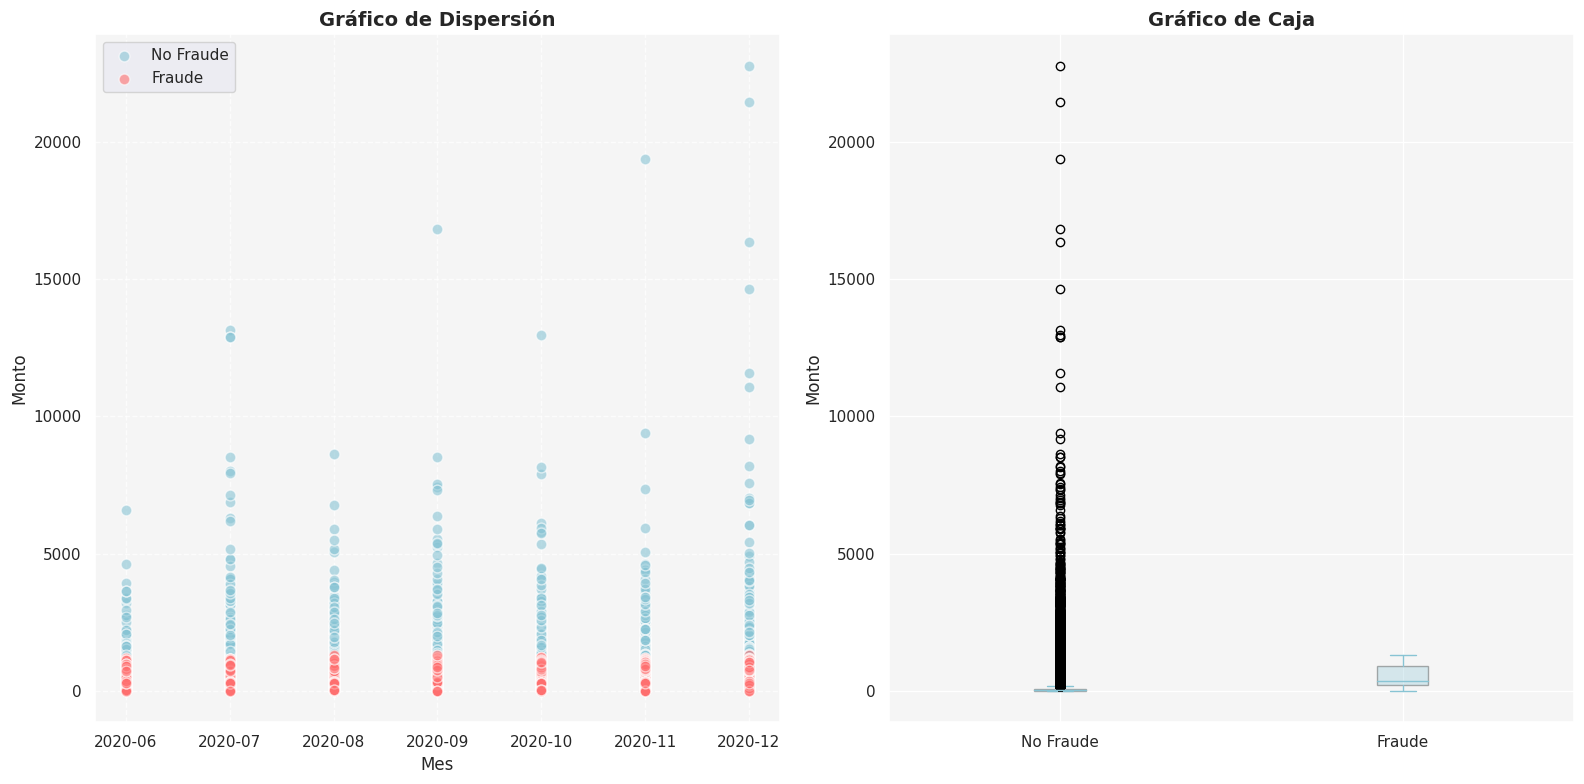

In [48]:
import matplotlib.pyplot as plt

def plot_transactions_by_month(df_fraude):
    """
    Esta función genera gráficos de dispersión, líneas, caja y pastel que muestran la distribución de las transacciones por mes,
    diferenciando entre transacciones fraudulentas y no fraudulentas.
    """
    fig, axs = plt.subplots(1, 2, figsize=(16, 8))

    # Configurar los fondos de los subgráficos
    for ax in axs:
        ax.set_facecolor('#f5f5f5')  # Fondo gris claro

    # Gráfico de dispersión
    df_no_fraude = df_fraude[df_fraude['es_fraude'] == 0]
    df_fraude = df_fraude[df_fraude['es_fraude'] == 1]

    axs[0].scatter(df_no_fraude['trans_mes'], df_no_fraude['monto'], color='#88c4d4', label='No Fraude', alpha=0.6, edgecolors='w', s=60)
    axs[0].scatter(df_fraude['trans_mes'], df_fraude['monto'], color='#ff6f6f', label='Fraude', alpha=0.6, edgecolors='w', s=60)
    axs[0].set_title('Gráfico de Dispersión', fontsize=14, fontweight='bold')
    axs[0].set_xlabel('Mes', fontsize=12)
    axs[0].set_ylabel('Monto', fontsize=12)
    axs[0].legend()
    axs[0].grid(True, linestyle='--', alpha=0.7)

    # Gráfico de caja
    axs[1].boxplot([df_no_fraude['monto'], df_fraude['monto']], labels=['No Fraude', 'Fraude'], patch_artist=True,
                   boxprops=dict(facecolor='#88c4d4', alpha=0.3), medianprops=dict(color='#88c4d4'),
                   whiskerprops=dict(color='#88c4d4'), capprops=dict(color='#88c4d4'))
    axs[1].set_title('Gráfico de Caja', fontsize=14, fontweight='bold')
    axs[1].set_ylabel('Monto', fontsize=12)

    plt.tight_layout()
    plt.show()

# Llamada a la función
plot_transactions_by_month(df_fraude)



En el gráfico de caja muestra la distribución de los montos de transacciones de tarjetas de crédito, comparando las transacciones fraudulentas (1) con las no fraudulentas (0). Los fraudes en tarjetas de crédito tienden a implicar montos más altos en comparación con las transacciones legítimas, lo que puede ser una indicación útil para la detección de fraudes. Además, la dispersión de los montos en las transacciones fraudulentas es mayor, indicando una mayor variabilidad en el valor de estas transacciones.

In [64]:
# Convertir la columna 'fecha_nacimiento' a tipo datetime
df_fraude['fecha_nacimiento'] = pd.to_datetime(df_fraude['fecha_nacimiento'])

# calcular la edad
df_fraude['edad'] = (2020  - df_fraude['fecha_nacimiento'].dt.year)

In [65]:
df_fraude['edad'].unique()

array([52, 30, 50, 33, 65, 29, 69, 48, 47, 64, 24, 44, 43, 83, 49, 32, 28,
       23, 35, 63, 72, 90, 46, 56, 62, 25, 40, 51, 45, 59, 77, 41, 34, 26,
       91, 86, 27, 21, 38, 22, 36, 42, 31, 53, 20, 71, 82, 54, 55, 75, 37,
       16, 68, 39, 70, 17, 66, 60, 79, 58, 74, 67, 96, 57, 19, 61, 94, 73,
       84, 85, 81, 78, 15, 76, 89, 93, 80, 92, 87, 88, 18], dtype=int32)

In [66]:
print("edad minima", df_fraude['edad'].min())
print("edad maxima", df_fraude['edad'].max())

edad minima 15
edad maxima 96


In [67]:
def aplicar_grupo_edad(edad):
    if edad <= 18:
        return 'Adolescente'
    elif edad <= 25:
        return 'Joven Adulto'
    elif edad <= 64:
        return 'Adulto'
    else:
        return 'Anciano'


df_fraude['grupo_edad'] = df_fraude['edad'].apply(aplicar_grupo_edad)
df_fraude['no_fraude']= df_fraude['es_fraude'].apply(lambda x: 1 if x == 0 else 0)

df_fraude.info()

<class 'pandas.core.frame.DataFrame'>
Index: 555719 entries, 0 to 555718
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   fecha_transaccion     555719 non-null  datetime64[ns]
 1   categoria             555719 non-null  object        
 2   monto                 555719 non-null  float64       
 3   genero                555719 non-null  object        
 4   ciudad                555719 non-null  object        
 5   estado                555719 non-null  object        
 6   latitud               555719 non-null  float64       
 7   longitud              555719 non-null  float64       
 8   poblacion_ciudad      555719 non-null  int64         
 9   trabajo               555719 non-null  object        
 10  fecha_nacimiento      555719 non-null  datetime64[ns]
 11  latitud_comerciante   555719 non-null  float64       
 12  longitud_comerciante  555719 non-null  float64       
 13  es_f

In [68]:
def annotate_bar(ax, custom_y_func, font_size = 14):
    for p in ax.patches:
        # Calcular la anotacion
        value = str(round(p.get_height(), 1))
        x = (p.get_x() + p.get_width() / 2) * 0.99
        y = ((p.get_y() + p.get_height() / 2) * 0.99)

        # Aplicar la función personalizada para ajustar la posición vertical
        y = custom_y_func(y)
        ax.annotate(
            value,
            (x,y),
            color="black",
            size= font_size, ha='center', va='center'
        )

<ipython-input-69-b8e45f897607>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_fraud_count, x='es_fraude', y='monto', palette=palette)
<ipython-input-69-b8e45f897607>:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
<ipython-input-69-b8e45f897607>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_fraud_amount, x='es_fraude', y='monto', palette=palette)
<ipython-input-69-b8e45f897607>:42: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['No Fraude', 'Fraude'], rotation=0)


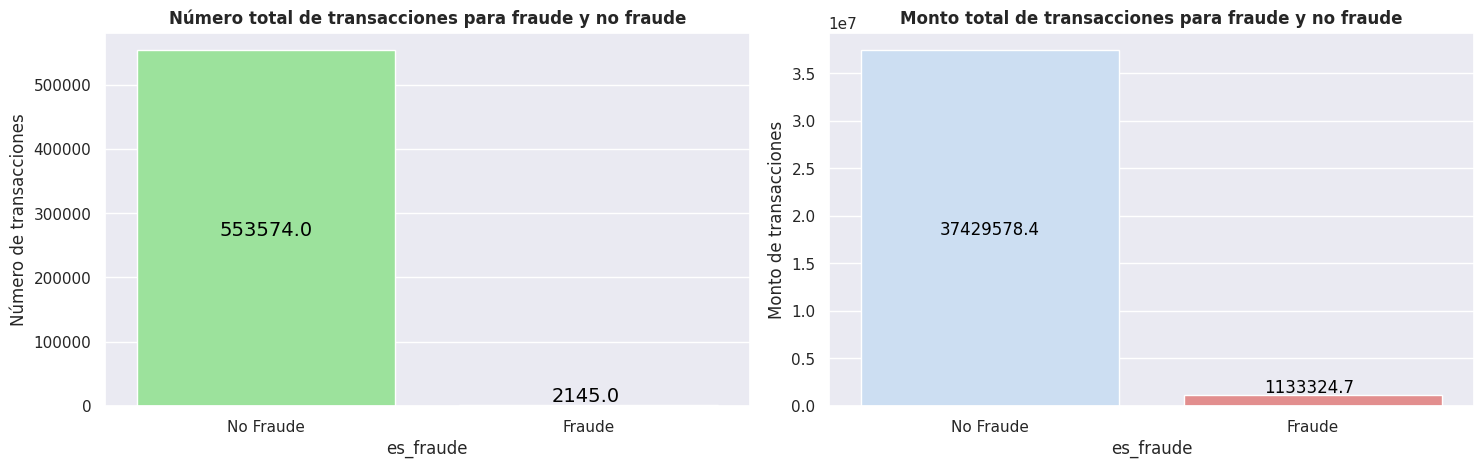

In [69]:
# Crear la figura y los subplots
fig = plt.figure(figsize=(15, 5))

# Primer gráfico: Número total de transacciones para fraude y no fraude
plt.subplot(1, 2, 1)

# Preparar los datos
df_fraud_count = df_fraude['es_fraude'].apply(lambda x: "Fraude" if x == 1 else 'No Fraude').value_counts().reset_index()
df_fraud_count.columns = ['es_fraude', 'monto']  # Renombrar columnas

# Crear el gráfico de barras con diferentes colores
palette = {'Fraude': 'coral', 'No Fraude': 'lightgreen'}  # Definir colores para cada categoría
ax = sns.barplot(data=df_fraud_count, x='es_fraude', y='monto', palette=palette)

# Añadir anotaciones
annotate_bar(ax, lambda y: 15000 if y < 10000 else y, font_size=14)

# Configurar el gráfico
plt.title('Número total de transacciones para fraude y no fraude', fontsize=12, fontweight='bold')
plt.ylabel("Número de transacciones")
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)



# Segundo gráfico: Monto total de transacciones para fraude y no fraude
plt.subplot(1, 2, 2)

# Preparar los datos
df_fraud_amount = df_fraude.groupby('es_fraude')['monto'].sum().reset_index()
df_fraud_amount['es_fraude'] = df_fraud_amount['es_fraude'].apply(lambda x: "Fraude" if x == 1 else 'No Fraude')

# Crear el gráfico de barras con diferentes colores
palette = {'Fraude': 'LightCoral', 'No Fraude': '#c6def8'}  # Definir colores para cada categoría
ax = sns.barplot(data=df_fraud_amount, x='es_fraude', y='monto', palette=palette)

# Añadir anotaciones
annotate_bar(ax, lambda y: 1900000 if y < 1200000 else y, font_size=12)

# Configurar el gráfico
plt.title('Monto total de transacciones para fraude y no fraude', fontsize=12, fontweight='bold')
plt.ylabel("Monto de transacciones")
ax.set_xticklabels(['No Fraude', 'Fraude'], rotation=0)

# Mostrar la figura
plt.tight_layout()
plt.show()

<ipython-input-70-b6c5e51dff55>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['No Fraude', 'Fraude'], rotation=0)  # Configurar las etiquetas del eje x


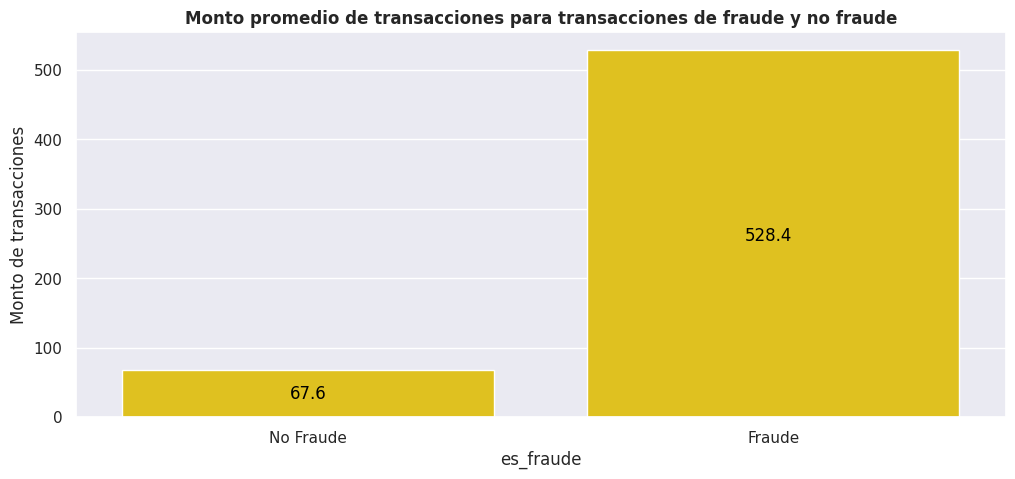

In [70]:
# Calcular el monto promedio de transacciones para transacciones fraudulentas y no fraudulentas
fig = plt.figure(figsize=(12, 5))  # Configurar el tamaño de la figura
avg_amt = df_fraude.groupby('es_fraude')['monto'].mean().reset_index()  # Agrupar por 'es_fraude' y calcular el promedio del monto de transacciones

# Crear el gráfico de barras usando Seaborn
ax = sns.barplot(data=avg_amt, x='es_fraude', y='monto', color='Gold')
# Añadir anotaciones a las barras para mostrar el monto promedio
annotate_bar(ax, lambda y: y, font_size=12)

# Configurar el título y las etiquetas del gráfico
plt.title('Monto promedio de transacciones para transacciones de fraude y no fraude', fontsize=12, fontweight='bold')
plt.ylabel("Monto de transacciones")
ax.set_xticklabels(['No Fraude', 'Fraude'], rotation=0)  # Configurar las etiquetas del eje x

# Mostrar el gráfico
plt.show()


**`PORCENTAJE POR GÉNERO`**

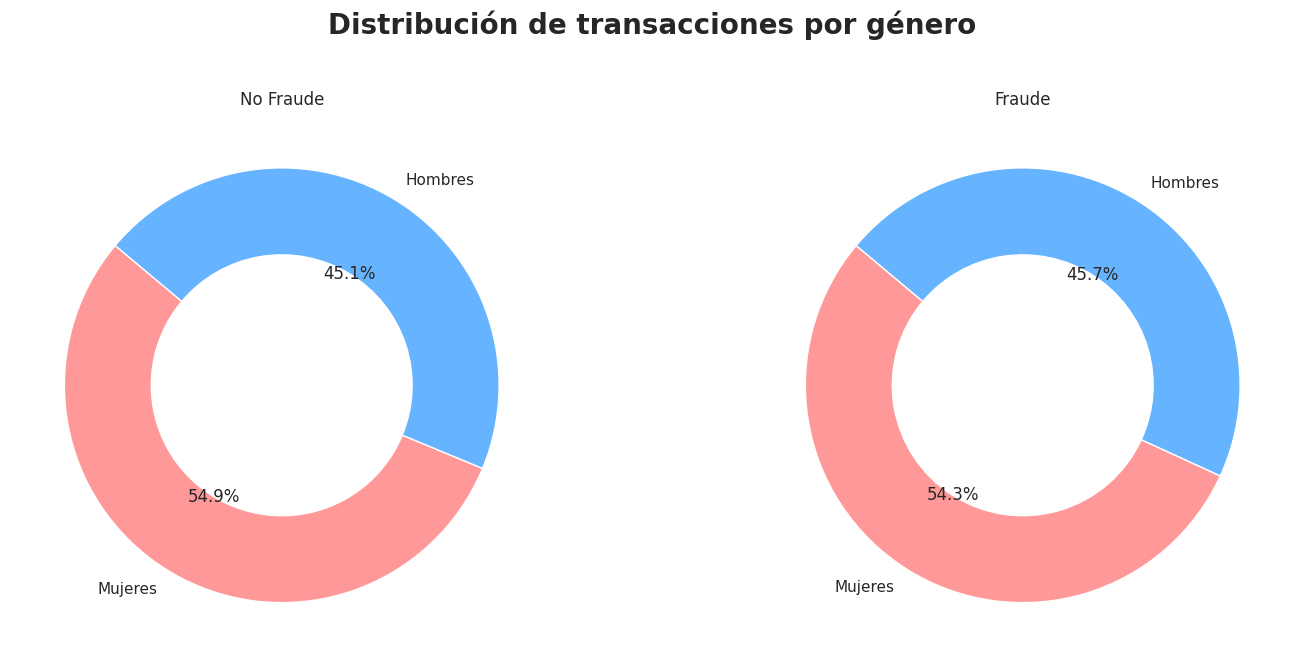

In [71]:
def plot_transactions_by_gender(df_fraude):
    fig, axs = plt.subplots(1, 2, figsize=(15, 7))
    plt.suptitle("Distribución de transacciones por género", fontsize=20, fontweight='bold')

    # Definir colores
    colors = ['#ff9999','#66b3ff']
    gender_labels = ['Mujeres', 'Hombres']
    status_labels = ["No Fraude", "Fraude"]

    for i in range(2):
        df_1 = df_fraude[df_fraude['es_fraude'] == i]
        gender_counts = df_1['genero'].value_counts()

        axs[i].pie(gender_counts, labels=gender_labels, autopct='%1.1f%%', colors=colors,
                   startangle=140, wedgeprops=dict(width=0.4))
        axs[i].set_title(status_labels[i])

    # Ajustar el diseño
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# Llamada a la función
plot_transactions_by_gender(df_fraude)

OBSERVACIÓN: Según los datos representados en el gráfico, el género femenino tiene un porcentaje más alto de fraudes en comparación con el género masculino.

In [ ]:
# transaccion por grupo de edad
def plot_transactions_by_age_group(df_fraude):
    fig, axs = plt.subplots(1, 2, figsize=(15, 7))
    plt.suptitle("Distribución de transacciones por grupo de edad", fontsize=20, fontweight='bold')

    # Definir colores
    colors = ['#ff5722', '#ff9800', '#ffc107', '#4caf50', '#2196f3']


    for i in range(2):
        df_1 = df_fraude[df_fraude['es_fraude'] == i]
        age_counts = df_1['grupo_edad'].value_counts()

        axs[i].pie(age_counts, labels=age_counts.index, autopct='%1.1f%%', colors=colors,
                   startangle=140, wedgeprops=dict(width=0.4))
        axs[i].set_title(["No Fraude", "Fraude"][i])

    # Ajustar el diseño
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# Llamada a la función
plot_transactions_by_age_group(df_fraude)

**`FRECUENCIA DE CATEGORiAS`**

<ipython-input-73-02b5ec4be0ba>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=category_counts.values, y=category_counts.index, palette=palette, dodge=False)


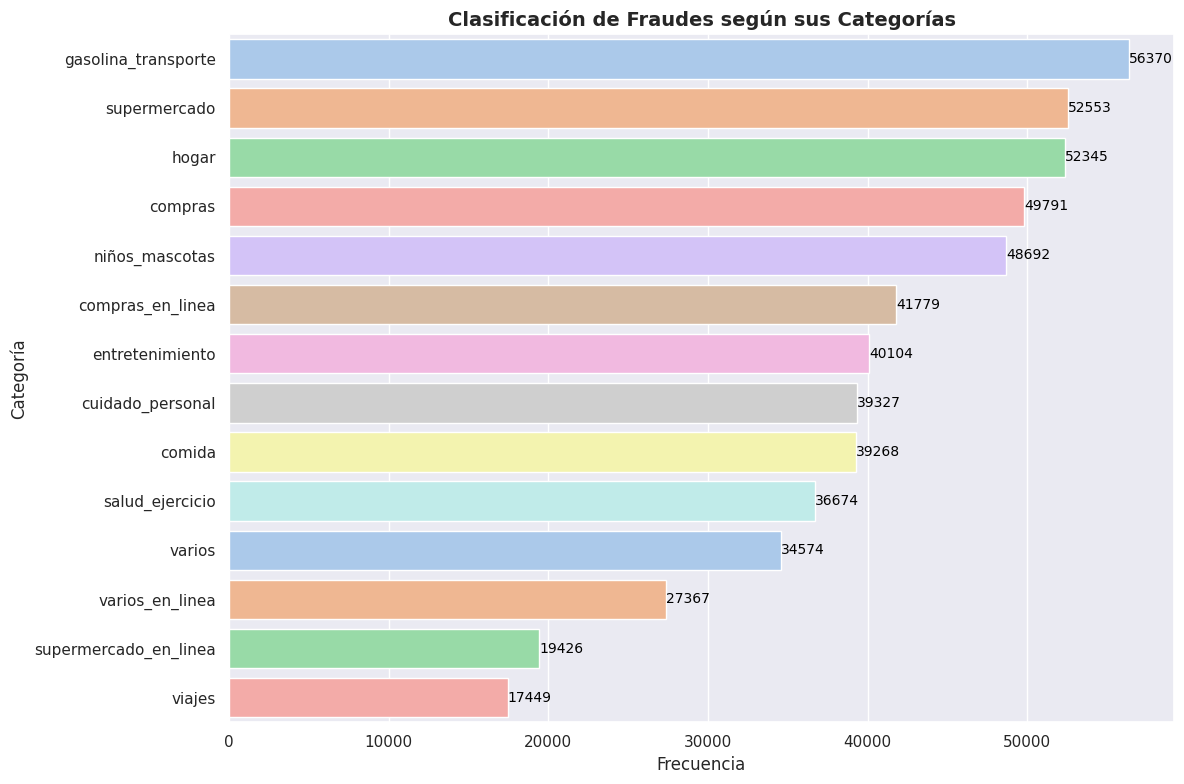

In [73]:
# Calculamos la frecuencia de cada categoría
category_counts = df_fraude['categoria'].value_counts()

# Ordenamos las categorías por frecuencia
category_counts = category_counts.sort_values(ascending=False)

# Creamos un gráfico de barras horizontales
plt.figure(figsize=(12, 8))  # Establecer el tamaño de la figura
palette = sns.color_palette('pastel', len(category_counts))  # Crear una paleta de colores

ax = sns.barplot(x=category_counts.values, y=category_counts.index, palette=palette, dodge=False)

# Añadir etiquetas de frecuencia en las barras
for index, value in enumerate(category_counts.values):
    ax.text(value, index, f'{value}', va='center', ha='left', fontsize=10, color='black')

# Establecemos etiquetas y título
plt.xlabel('Frecuencia', fontsize=12)
plt.ylabel('Categoría', fontsize=12)
plt.title('Clasificación de Fraudes según sus Categorías', fontsize=14, fontweight='bold')

# Mejorar el espaciado
plt.tight_layout()

# Mostrar el gráfico
plt.show()


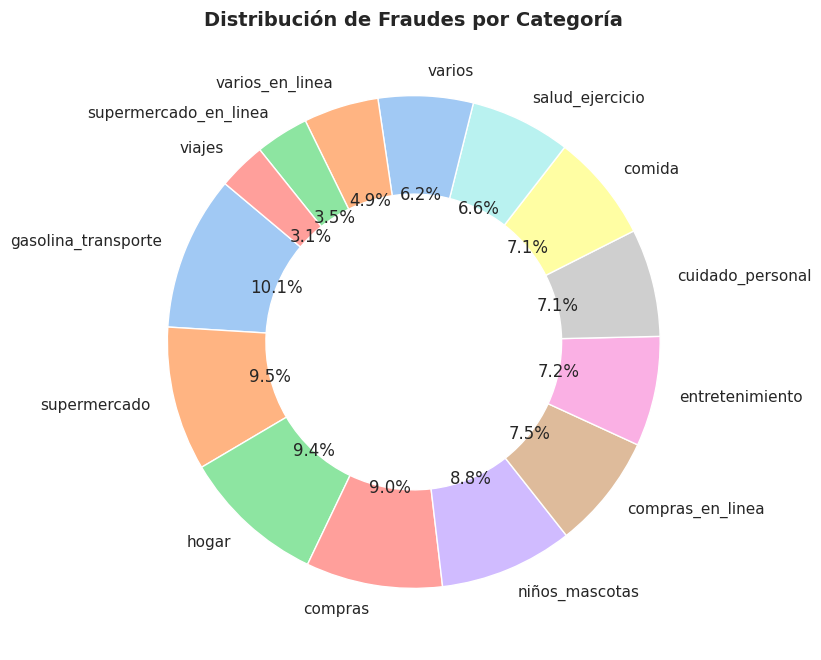

In [55]:
# Calculamos la frecuencia de cada categoría
category_counts = df_fraude['categoria'].value_counts()

# Ordenamos las categorías por frecuencia
category_counts = category_counts.sort_values(ascending=False)

# Función personalizada para centrar los porcentajes en el gráfico de torta
def autopct_centered(pct, allvalues):
    absolute = int(pct / 100.*sum(allvalues))
    return f'{pct:.1f}%'

# Creamos un gráfico de torta
plt.figure(figsize=(10, 8))  # Establecer el tamaño de la figura
colors = sns.color_palette('pastel', len(category_counts))  # Crear una paleta de colores

plt.pie(category_counts, labels=category_counts.index, autopct=lambda pct: autopct_centered(pct, category_counts), colors=colors, startangle=140, wedgeprops=dict(width=0.4))

# Establecemos título
plt.title('Distribución de Fraudes por Categoría', fontsize=14, fontweight='bold')

# Mostrar el gráfico
plt.show()



OBSERVACIÓN: Las 5 categorías más frecuentes son



1.   Compras en linea
2.   Supermercado
3.   Varios en linea
4.   Compras
5.   Gasolina transporte











**`DIAGRAMA DE DISPERSIÓN`**

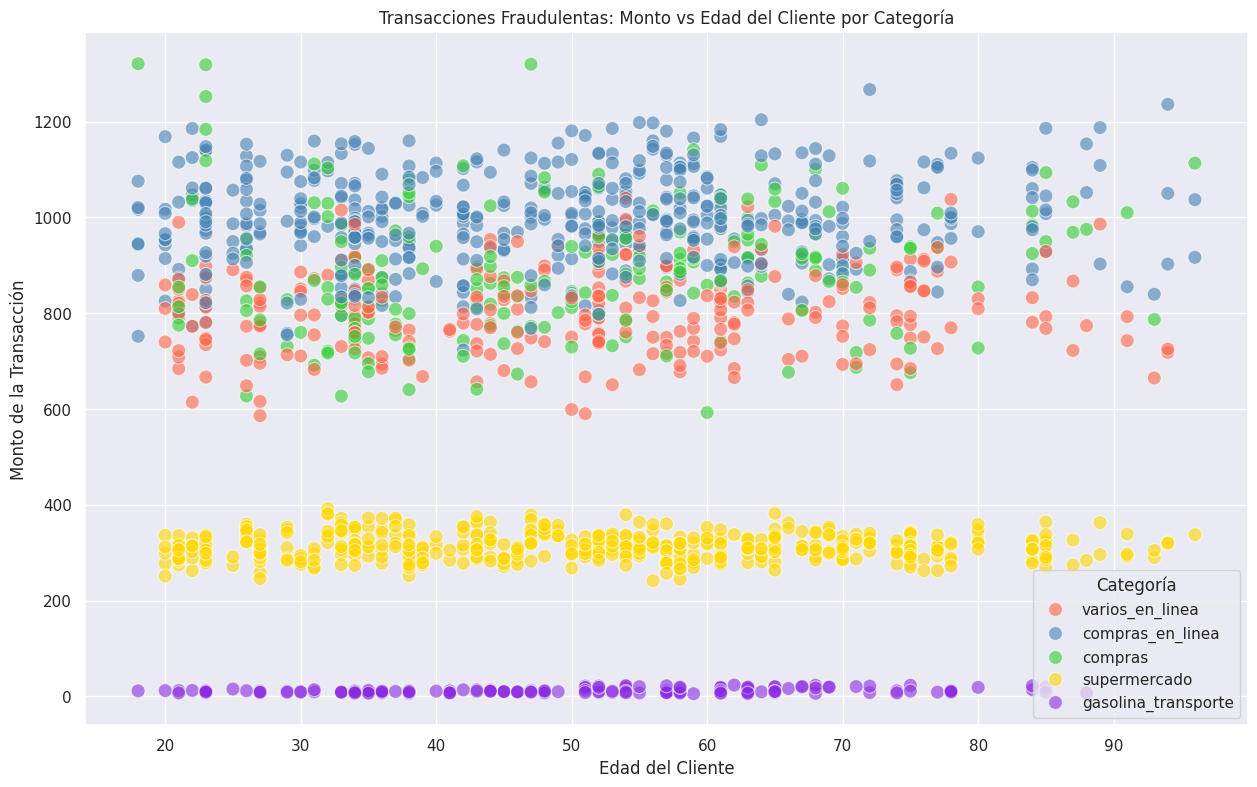

In [57]:
# Filtramos el DataFrame para seleccionar solo las categorías específicas
categorias_interes = ["compras_en_linea", "supermercado", "varios_en_linea", "compras", "gasolina_transporte"]
transacciones_filtradas = transacciones_fraudulentas[transacciones_fraudulentas['categoria'].isin(categorias_interes)]

# Definimos una paleta de colores
paleta_colores = sns.color_palette(["#FF6347", "#4682B4", "#32CD32", "#FFD700", "#8A2BE2"])

# Creamos el gráfico de dispersión
plt.figure(figsize=(15, 9))
sns.scatterplot(x='edad_cliente', y='monto', data=transacciones_filtradas, hue='categoria', palette=paleta_colores, s=100, alpha=0.6)

# Agregamos etiquetas y título
plt.xlabel("Edad del Cliente")
plt.ylabel("Monto de la Transacción")
plt.title("Transacciones Fraudulentas: Monto vs Edad del Cliente por Categoría")

# Mostramos el gráfico
plt.legend(title='Categoría')
plt.show()

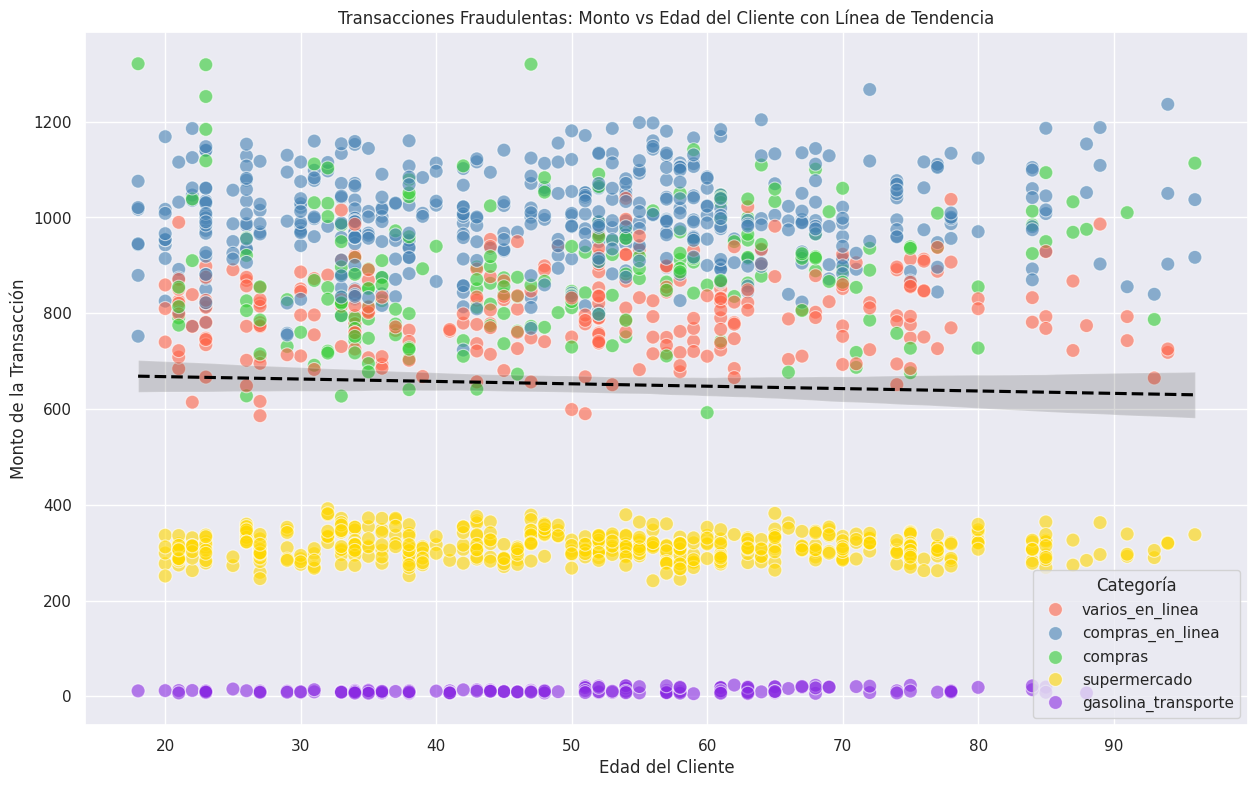

In [58]:
plt.figure(figsize=(15, 9))
sns.scatterplot(x='edad_cliente', y='monto', data=transacciones_filtradas, hue='categoria', palette=paleta_colores, s=100, alpha=0.6)
sns.regplot(x='edad_cliente', y='monto', data=transacciones_filtradas, scatter=False, color='black', line_kws={'linestyle': '--'})
plt.xlabel("Edad del Cliente")
plt.ylabel("Monto de la Transacción")
plt.title("Transacciones Fraudulentas: Monto vs Edad del Cliente con Línea de Tendencia")
plt.legend(title='Categoría')
plt.show()


OBSERVACIÓN: Las transacciones fraudulentas se concentran principalmente en las categorías "compras en linea" y "varios en linea", siendo asi que los fraudes pueden producirse de manera online, además la concentración de puntos se encuentra entre las edades de 20 y 50 años

<ipython-input-27-a62d37cffd9e>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conteo_estados.index, y=conteo_estados.values, palette='plasma')


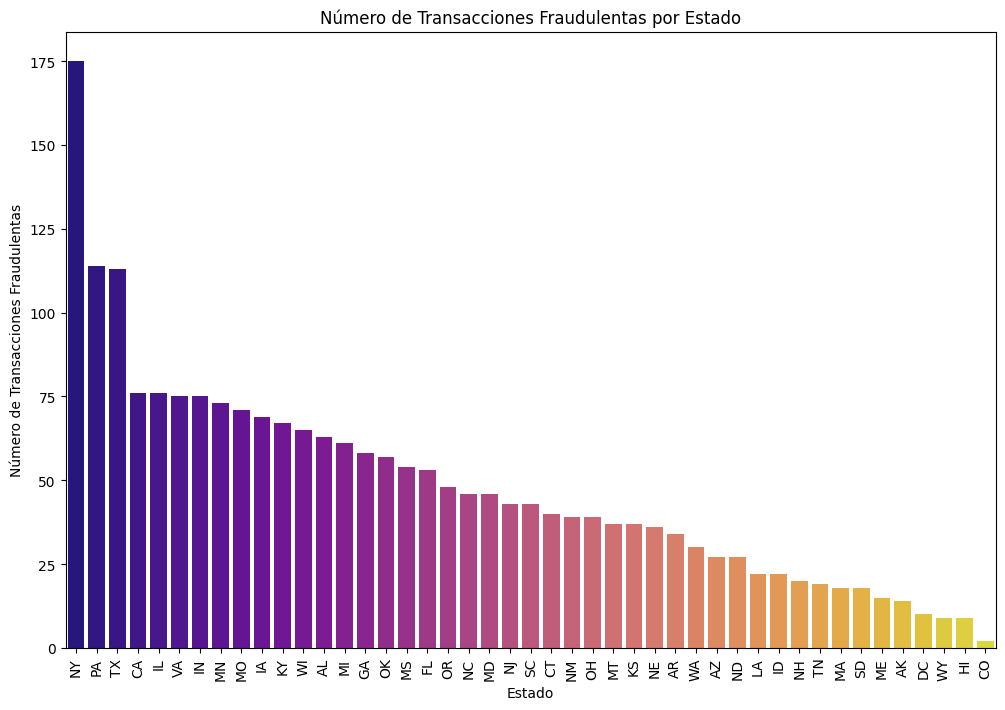

In [27]:
# Contamos las transacciones por estado
conteo_estados = transacciones_fraudulentas['estado'].value_counts()

# Creamos el gráfico de barras
plt.figure(figsize=(12, 8))
sns.barplot(x=conteo_estados.index, y=conteo_estados.values, palette='plasma')

# Agregamos etiquetas y título
plt.xticks(rotation=90)
plt.xlabel("Estado")
plt.ylabel("Número de Transacciones Fraudulentas")
plt.title("Número de Transacciones Fraudulentas por Estado")

# Mostramos el gráfico
plt.show()

OBSERVACIÓN: Se ve un alto número de transacciones fraudulentas en el estado de Nueva York (NY), superando los 150 casos, además, se observa una caída considerable, siendo Pensilvania (PA) el segundo estado con un poco más de 100 transacciones fraudulentas, seguido muy de cerca por Texas (TX).
Estos tres estados presentan las cifras más altas en transacciones fraudulentas.

**`FRAUDE POR HORARIO`**

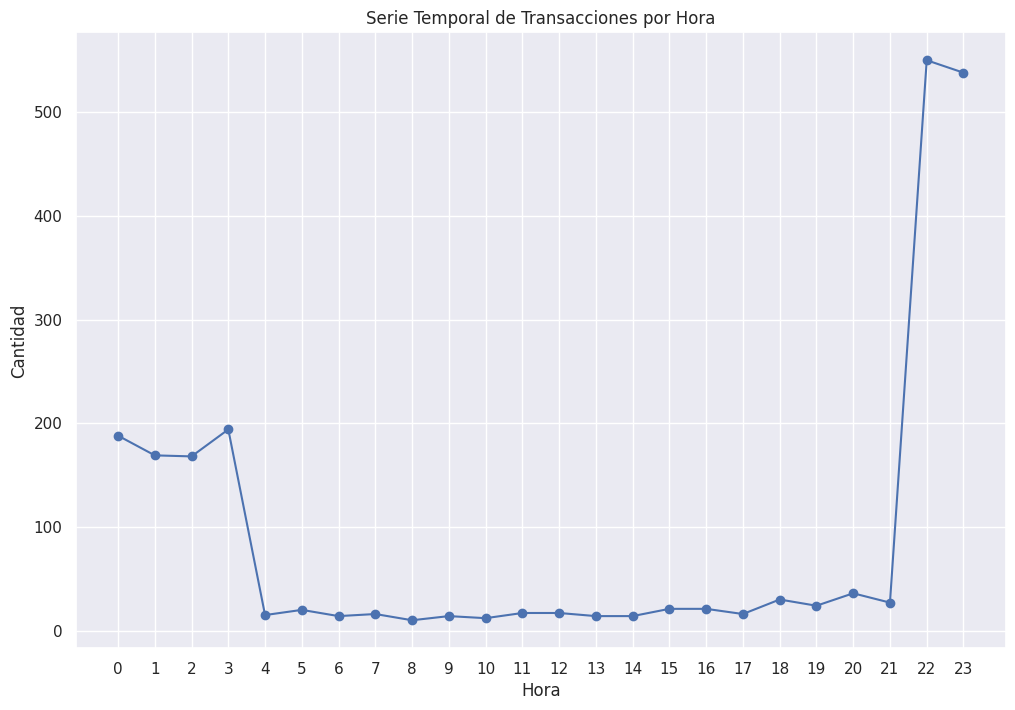

In [28]:
plt.figure(figsize=(12, 8))
sns.set_theme(style="darkgrid")

# Creamos una serie con todas las horas posibles
todas_las_horas = pd.DataFrame({'trans_hora': range(24)})

# Agrupamos por hora y calculamos conteos
conteos_por_hora = transacciones_fraudulentas.groupby("trans_hora").size().reset_index(name='cantidad')

# Unimos con todas las horas y llenar valores faltantes con ceros
conteos_completos = pd.merge(todas_las_horas, conteos_por_hora, on="trans_hora", how="left").fillna(0)

# Graficamos
plt.plot(conteos_completos["trans_hora"], conteos_completos["cantidad"], marker='o', linestyle='-')
plt.xlabel("Hora")
plt.ylabel("Cantidad")
plt.title("Serie Temporal de Transacciones por Hora")
plt.xticks(range(24))
plt.grid(True)
plt.show()

OBSERVACIÓN: Las horas con mayor actividad se encuentran en la noche, a partir de las 21 horas alcanzando un pico máximo alrededor de las 22 horas con más de 500 transacciones.

**`FRAUDE POR HORARIO Y GÉNERO`**

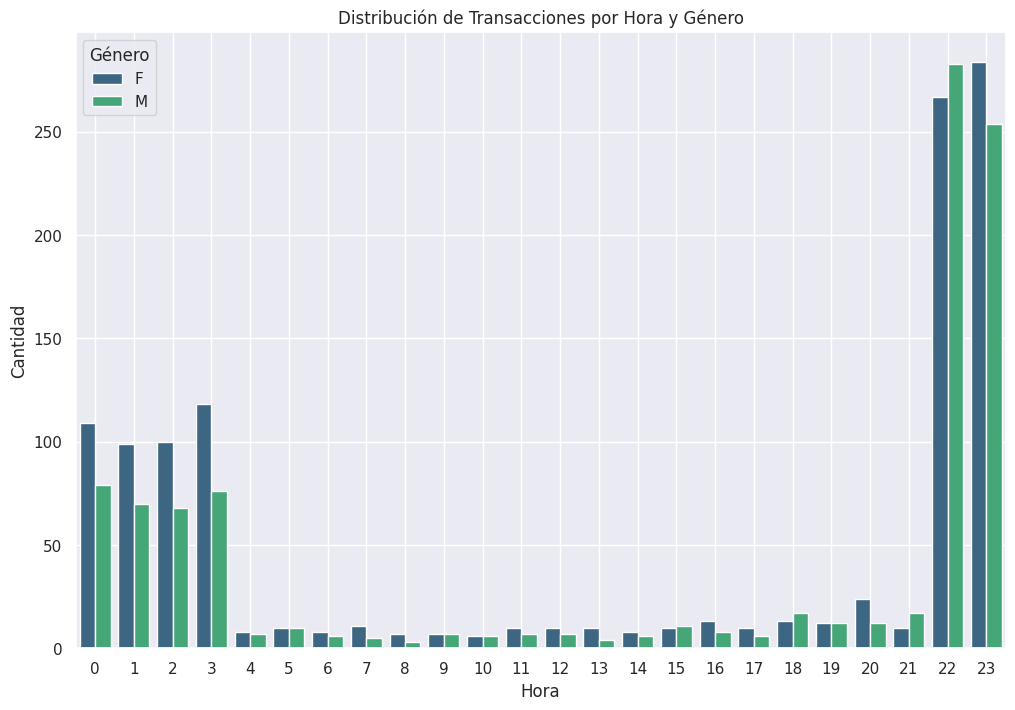

In [29]:
# Agrupamos por hora y género, y contamos el número de eventos
conteos_por_hora_genero = transacciones_fraudulentas.groupby(['trans_hora', 'genero']).size().reset_index(name='cantidad')

# Graficamos usando barras apiladas
plt.figure(figsize=(12, 8))
sns.set_theme(style="darkgrid")

# Creamos el gráfico de barras apiladas
sns.barplot(data=conteos_por_hora_genero, x='trans_hora', y='cantidad', hue='genero', palette="viridis")

plt.xlabel("Hora")
plt.ylabel("Cantidad")
plt.title("Distribución de Transacciones por Hora y Género")
plt.xticks(range(24))
plt.grid(True)
plt.legend(title='Género')
plt.show()

OBSERVACIÓN: Durante la madrugada de 0 a 3, se registra un mayor número de transacciones realizadas por el género femenino (Género F) en comparación con el género masculino (Género M).
Durante la tarde, la actividad se mantiene constante entre ambos géneros. En el transcurso de la noche, a partir de las 22 horas, el género masculino supera al femenino con casi 300 transacciones y una hora mas tarde, a las 23 horas, el género femenino supera al masculino, también con 300 transacciones.

In [30]:
# Asegúrate de que la columna 'fecha_transaccion' es de tipo datetime
df_fraude['fecha_transaccion'] = pd.to_datetime(df_fraude['fecha_transaccion'])


# Extrae el mes de la transacción
df_fraude['trans_mes'] = df_fraude['fecha_transaccion'].dt.to_period('M').astype("str")  # Extraer el mes en formato de periodo

# Extraer el nombre del día de la semana de 'fecha_transaccion'
df_fraude['trans_diaDeLaSemana'] = df_fraude['fecha_transaccion'].dt.day_name()  # Extraer el nombre del día de la semana

# Verifica las primeras filas para asegurarte de que la operación se realizó correctamente
df_fraude.head(5)


<ipython-input-30-bf6f473b4014>:2: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_fraude['fecha_transaccion'] = pd.to_datetime(df_fraude['fecha_transaccion'])


,fecha_transaccion,num_tarjeta,comerciante,categoria,monto,nombre,apellido,genero,calle,ciudad,...,num_transaccion,tiempo_unix,latitud_comerciante,longitud_comerciante,es_fraude,trans_fecha,trans_hora,edad_cliente,trans_mes,trans_diaDeLaSemana
0,2020-06-21 12:14:00,2.291160e+15,fraud_Kirlin and Sons,cuidado_personal,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,...,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0,2020-06-21,12,52,2020-06,Sunday
1,2020-06-21 12:14:00,3.573030e+15,fraud_Sporer-Keebler,cuidado_personal,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,...,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0,2020-06-21,12,30,2020-06,Sunday
2,2020-06-21 12:14:00,3.598220e+15,"fraud_Swaniawski, Nitzsche and Welch",salud_ejercicio,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,...,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0,2020-06-21,12,50,2020-06,Sunday
3,2020-06-21 12:15:00,3.591920e+15,fraud_Haley Group,varios,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,...,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0,2020-06-21,12,33,2020-06,Sunday
4,2020-06-21 12:15:00,3.526830e+15,fraud_Johnston-Casper,viajes,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,...,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0,2020-06-21,12,65,2020-06,Sunday


<ipython-input-75-a9ca6f84b827>:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
<ipython-input-75-a9ca6f84b827>:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


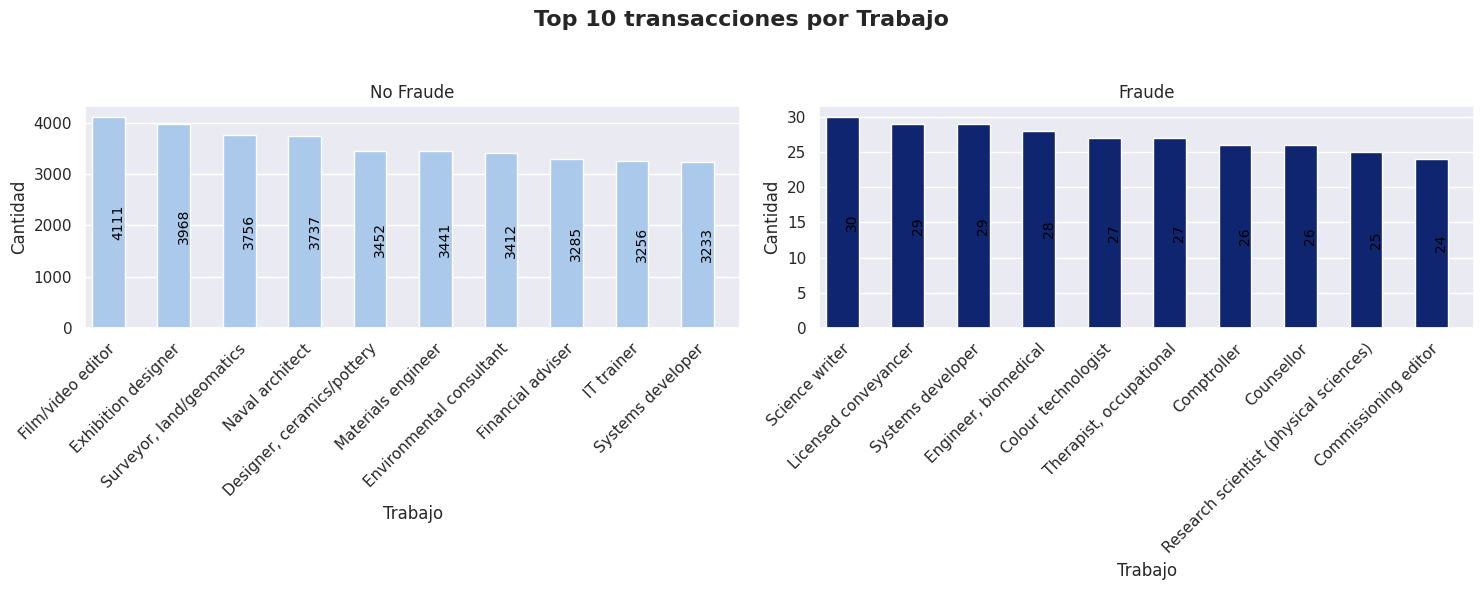

<ipython-input-75-a9ca6f84b827>:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
<ipython-input-75-a9ca6f84b827>:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=0)


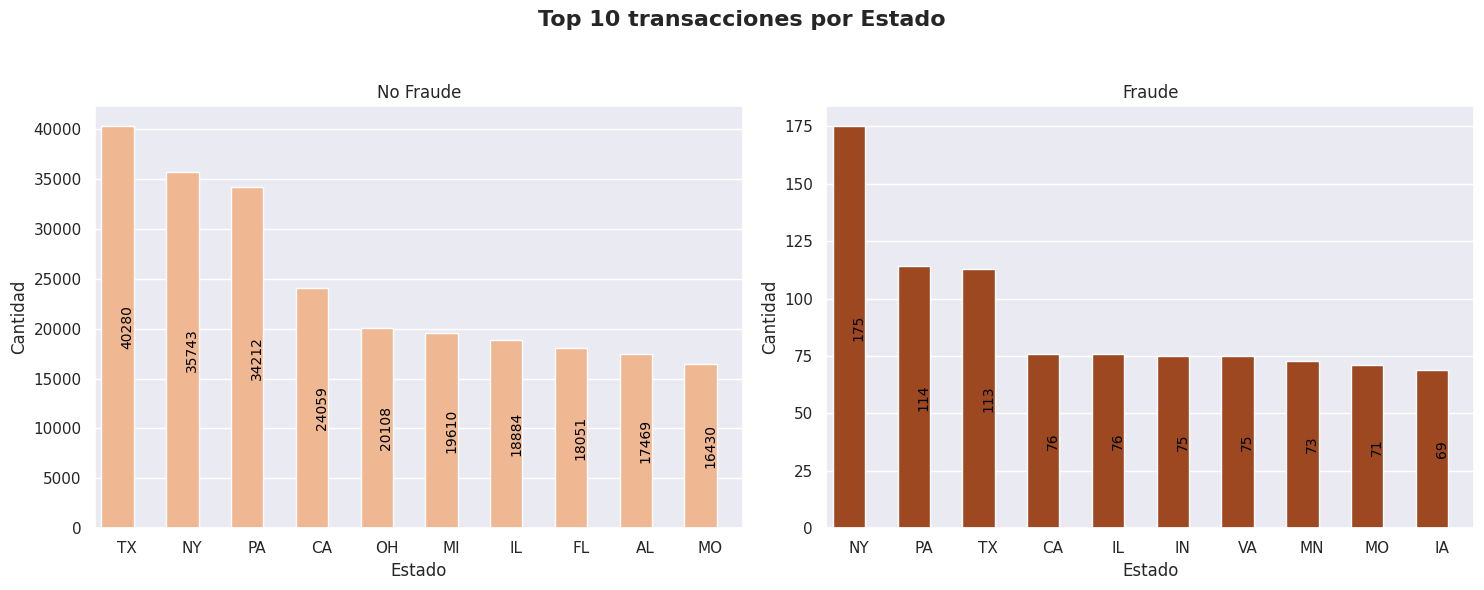

<ipython-input-75-a9ca6f84b827>:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
<ipython-input-75-a9ca6f84b827>:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


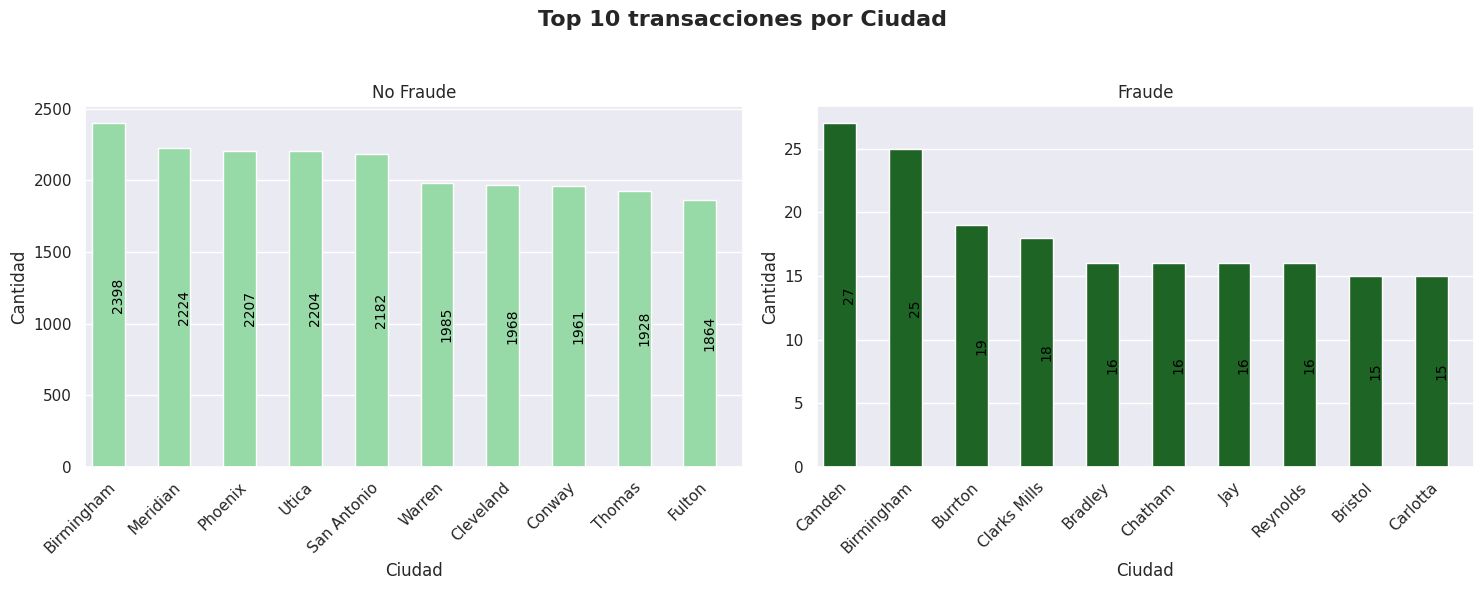

In [75]:
# Definir columnas y nombres
columns = ['trabajo', 'estado', 'ciudad']
columns_name = ['Trabajo', 'Estado', 'Ciudad']
fraud = ['No Fraude', 'Fraude']

# Definir paletas de colores pastel
colors_no_fraud = sns.color_palette("pastel")  # Colores pastel para no fraude
colors_fraud = sns.color_palette("dark")  # Colores más oscuros para fraude

# Generar gráficos
for y, col in enumerate(columns):
    name = columns_name[y]
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
    fig.suptitle(f"Top 10 transacciones por {name}", fontsize=16, fontweight="bold")

    for i, ax in enumerate(axes):
        temp_df = df_fraude[df_fraude['es_fraude'] == i]
        top = temp_df.groupby(col).size().nlargest(10).reset_index(name='Count')

        # Usar colores diferentes para no fraude y fraude
        color = colors_no_fraud[y] if i == 0 else colors_fraud[y]

        sns.barplot(data=top, x=col, y='Count', color=color, ax=ax)

        # Ajustes de etiquetas y títulos
        if col == 'estado':
            ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
        else:
            ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

        ax.set_ylabel('Cantidad')
        ax.set_xlabel(name)
        ax.set_title(fraud[i])

        # Ajustar el tamaño de las barras
        for p in ax.patches:
            ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height() / 2),
                        ha='center', va='center', xytext=(0, 0), textcoords='offset points', color='black', rotation=90, fontsize=10)

        # Reducir el ancho de las barras
        for p in ax.patches:
            p.set_width(0.5)

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

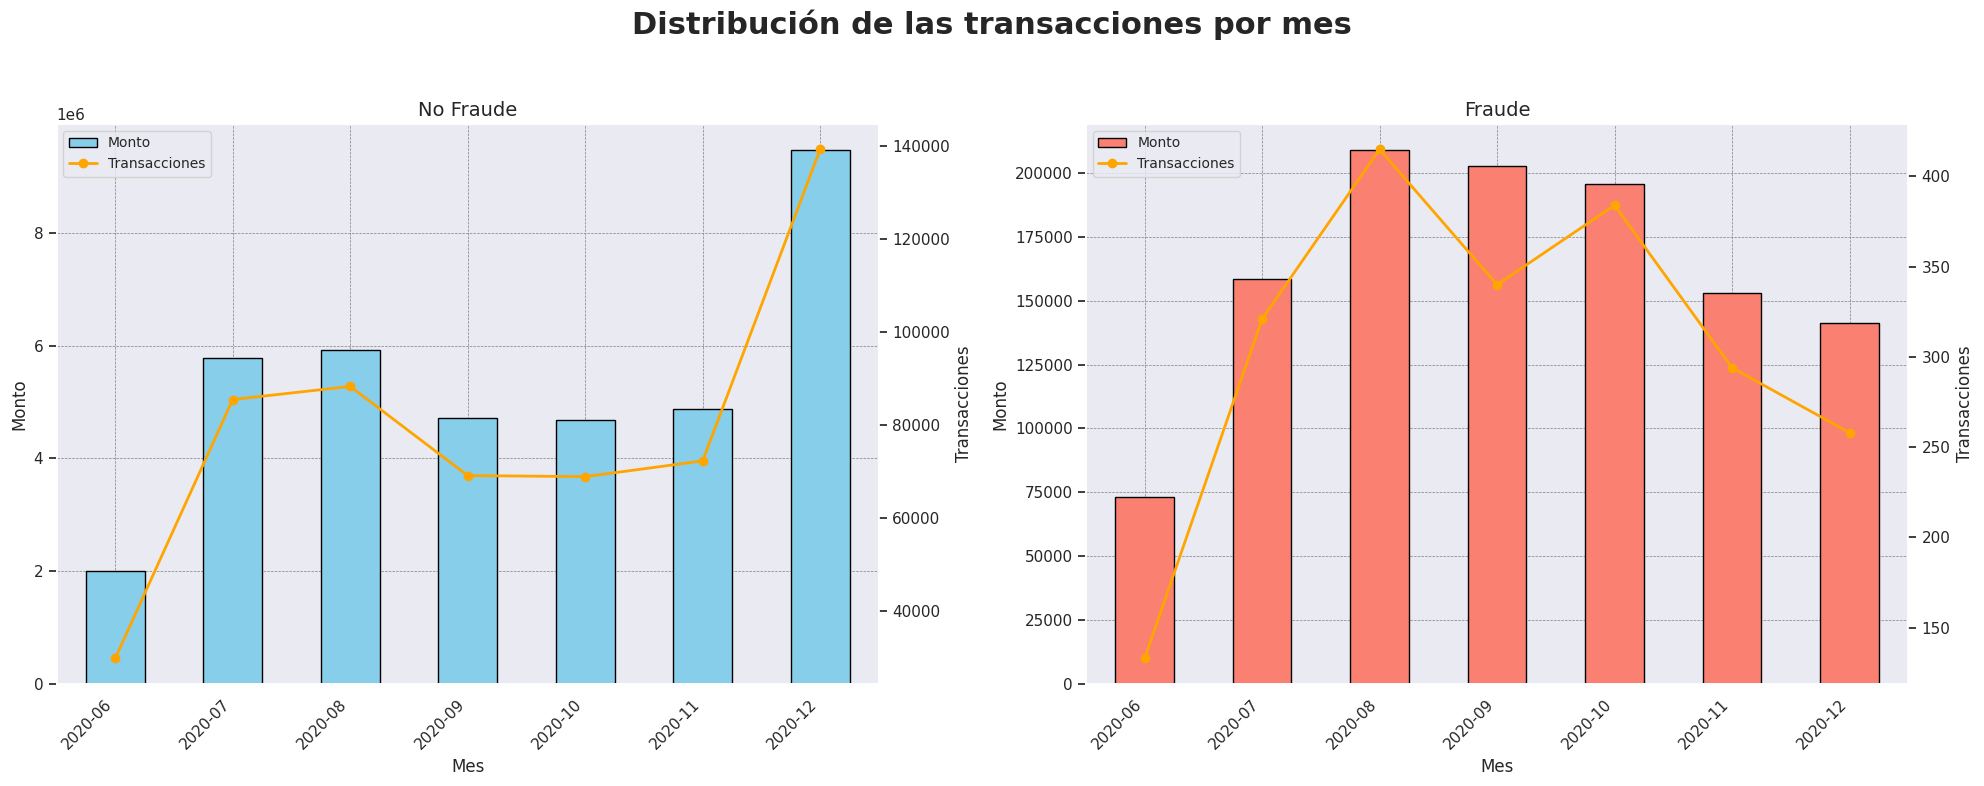

In [31]:
def plot_transactions_by_month(df_fraude):
    # Crear una figura con dos subgráficas
    fig, axs = plt.subplots(1, 2, figsize=(20, 8), sharex=True, sharey=False)
    fig.suptitle("Distribución de las transacciones por mes", fontsize=22, fontweight='bold')

    # Colores para las gráficas
    colores_barras = ['skyblue', 'salmon']
    color_linea = 'orange'

    for i, ax in enumerate(axs):
        # Filtrar los datos según el tipo de fraude
        df_1 = df_fraude[df_fraude['es_fraude'] == i]

        # Gráfico de barras para el monto
        df_1.groupby('trans_mes')['monto'].sum().plot(kind='bar', ax=ax, color=colores_barras[i], label='Monto', edgecolor='black')
        ax.set_ylabel('Monto', fontsize=12)
        ax.set_xlabel('Mes', fontsize=12)
        ax.set_title(["No Fraude", "Fraude"][i], fontsize=14)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

        # Crear un segundo eje y para las transacciones
        ax2 = ax.twinx()
        df_1.groupby('trans_mes').size().plot(kind='line', ax=ax2, color=color_linea, marker='o', label='Transacciones', linewidth=2)
        ax2.set_ylabel('Transacciones', fontsize=12)

        # Combinar leyendas
        handles1, labels1 = ax.get_legend_handles_labels()
        handles2, labels2 = ax2.get_legend_handles_labels()
        ax2.legend(handles1 + handles2, labels1 + labels2, loc='upper left', fontsize=10)

        # Mejorar apariencia del gráfico
        ax.grid(True, linestyle='--', linewidth=0.5, color='grey')
        ax2.grid(False)  # Desactivar cuadrícula en el segundo eje

    # Ajustar el diseño para que el título se muestre correctamente
    plt.tight_layout(rect=[0, 0, 1, 0.95])  # Ajuste del diseño para que se ajuste el título
    plt.show()

# Llamada a la función
plot_transactions_by_month(df_fraude)


OBSERVACIÓN:

La gráfica revela un patrón claro en la actividad transaccional a lo largo del año. A partir de noviembre, se observa un notable incremento en el volumen de transacciones, alcanzando su punto máximo en diciembre, el mes con mayor actividad transaccional. Sin embargo, el análisis de la cantidad de fraudes muestra una tendencia diferente: los meses con mayor incidencia de fraudes son de agosto a octubre, con una disminución significativa en noviembre y diciembre. Este contraste sugiere que, aunque el volumen de transacciones aumenta hacia el final del año, la tasa de fraudes no sigue el mismo patrón y se concentra en meses previos.

In [ ]:
# !pip install plotly requests
'''
import plotly.express as px
import requests

# URL de un archivo GeoJSON de EE.UU.
geojson_url = 'https://raw.githubusercontent.com/PublicaMundi/MappingAPI/master/data/geojson/us-states.json'

# Descargar el archivo GeoJSON
response = requests.get(geojson_url)
geojson = response.json()


# Crear un gráfico de dispersión geográfico utilizando Plotly
fig = px.scatter_geo(
    credit_card_fraud,
    lat='latitud',  # latitud del titular de la tarjeta
    lon='longitud',  # longitud del titular de la tarjeta
    color='es_fraude',  # variable que indica si es fraude o no
    hover_data=['latitud_comerciante', 'longitud_comerciante'],  # Ajusta según sea necesario.
    title='Ubicación de Fraudes por Latitud y Longitud de Titular en Estados Unidos'
)

# Eliminar la leyenda de colores
fig.update_layout(coloraxis_showscale=False)

# Configuración del mapa para centrarse en Estados Unidos
fig.update_geos(
    scope="usa",
    showcountries=True,
    countrycolor="RebeccaPurple"
)

fig.show()
'''

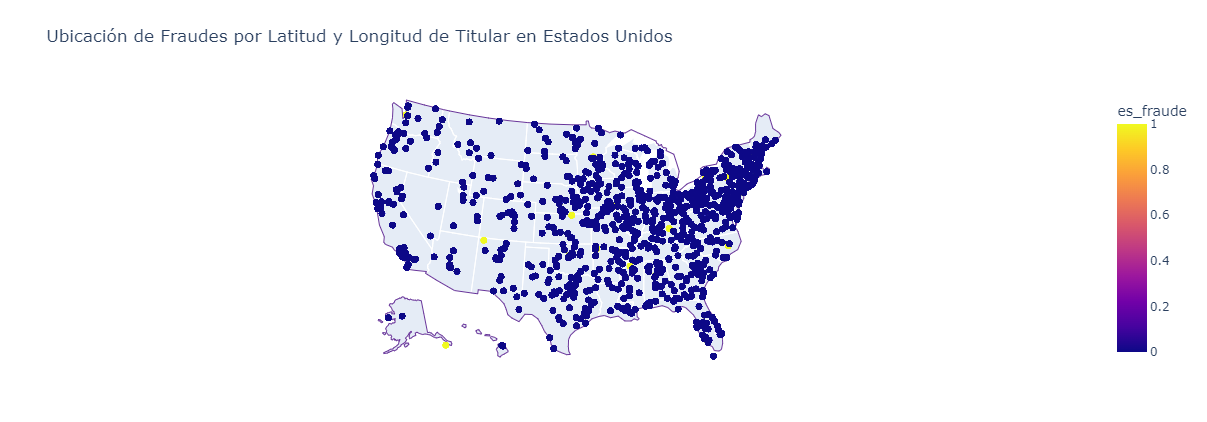

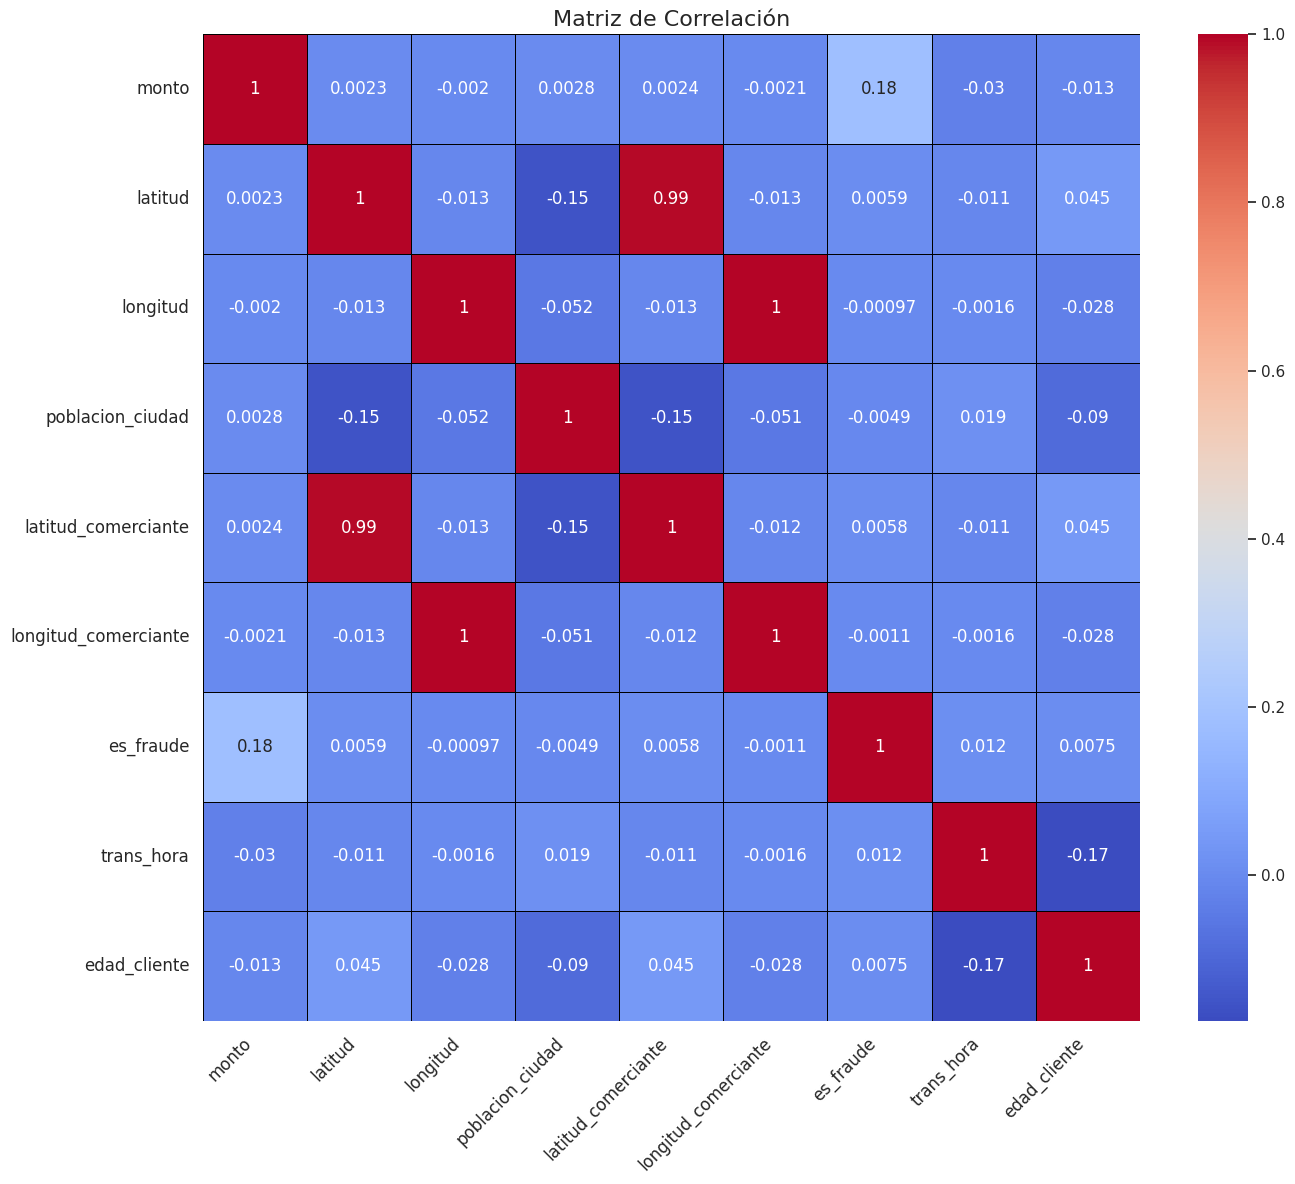

In [35]:
# Seleccionar solo las columnas numéricas
numeric_columns = df_fraude.select_dtypes(include=['number']).columns

# Calcular la matriz de correlación
correlation_matrix = df_fraude[numeric_columns].corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, linecolor='black')
plt.title('Matriz de Correlación', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


**Eliminar columnas**

In [32]:
df_fraude.drop(columns=['num_transaccion','num_tarjeta','comerciante','nombre','apellido','calle','codigo_postal','tiempo_unix'],axis=1,inplace=True)

**Guardar Los cambios del Dataset**

In [33]:
arch='/content/drive/My Drive/Curso Ingenias/fraud_credit.csv'
df_fraude.to_csv(arch, sep=',', index=False, encoding='utf-8')

# CONCLUSIONES

 Observamos que las transacciones fraudulentas se concentran en ciertos estados
como Nueva York y Pennsylvania, los cuales se encuentran geográficamente cercanos en la región noreste de Estados Unidos, además se observa como es que estas transacciones se realizan durante las horas de la noche, especialmente entre las 8:00 PM y 3:00 AM.

Se observa un aumento en la actividad transaccional desde noviembre, con un máximo en diciembre. Sin embargo, los fraudes son más frecuentes entre agosto y octubre, disminuyendo en los meses finales del año. Esto indica que, a pesar del aumento en las transacciones al final del año, los fraudes se concentran en los meses previos.

En cuanto a la relación entre la edad del cliente y el monto de las transacciones fraudulentas, se observa una tendencia en la que los montos de las transacciones fraudulentas tienden a ser mayores a medida que aumenta la edad del cliente.

Finalmente, las transacciones fraudulentas en línea muestran una mayor incidencia de montos elevados en comparación con otras categorías, que generalmente presentan montos fraudulentos más bajos.